# Cian flats EDA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import babel.numbers

import seaborn as sns

# USE THIS STYLE
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
# 
# OR THIS STYLE
import aquarel

import warnings

warnings.filterwarnings("ignore")

theme = aquarel.load_theme("arctic_light")
theme.set_font(family="serif")
theme.apply()

# Сделаем автоподгрузку всех изменений при перепрогонке ячейки
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
custom_pallete = {
    "red": "#BF616A",
    "orange": "#D08770",
    "yellow": "#EBCB8B",
    "green": "#A3BE8C",
    "purple": "#B48EAD",
    "light_green": "#8FBCBB",
    "light_gray_blue": "#88C0D0",
    "light_blue": "#81A1C1",
    "blue": "#5E81AC",
}

## Load data

In [3]:
df_cian = pd.read_csv("./data/cian_houses_dataset.csv")
df_cian.head()

price                                           location    geo_lat  \
0  18374400  Москва, СВАО, р-н Марьина роща, Тэйт жилой ком...  55.802530   
1  49954800  Москва, ЦАО, р-н Таганский, Славянская пл., 2/5с1  55.752541   
2   8170000  Москва, НАО (Новомосковский), Филимонковское п...  55.552637   
3  20206500  Москва, СВАО, р-н Останкинский, ул. Годовикова...  55.810466   
4  17119620  Москва, ЮАО, р-н Даниловский, Автозаводская ул...  55.706597   

     geo_lng             metro  floor  floor_count  square living_square  \
0  37.620945      Марьина Роща     34           49   38.28          11.8   
1  37.635727       Китай-город      7            8   53.20       unknown   
2  37.337172  Аэропорт Внуково      2            5   31.00       unknown   
3  37.624247      Алексеевская     34           37   28.50          21.4   
4  37.632285          Тульская      6           20   38.82          10.6   

  kitchen_square  ... ceiling_height      view           house_type  \
0        unknown  ...           3.12   unknown  Монолитно-кирпичный   
1           24.1  ...            3.0   unknown  Монолитно-кирпичный   
2           10.0  ...            3.0   Во двор              unknown   
3        unknown  ...           3.01  На улицу  Монолитно-кирпичный   
4           18.6  ...           2.85   Во двор           Монолитный   

          heating breakdown  parking       accomodation_type   author  \
0         unknown   unknown  unknown             Новостройка  КОРТРОС   
1         unknown   unknown  unknown  Вторичка / Апартаменты  unknown   
2  Нет информации       Нет  unknown                Вторичка  unknown   
3         unknown   unknown  unknown             Новостройка  КОРТРОС   
4         unknown   unknown  unknown             Новостройка  unknown   

                                        url room_count  
0  https://www.cian.ru/sale/flat/302789697/          1  
1  https://www.cian.ru/sale/flat/301496936/          1  
2  https://www.cian.ru/sale/flat/303552909/          1  
3  https://www.cian.ru/sale/flat/306568424/          1  
4  https://www.cian.ru/sale/flat/305679800/          1  

[5 rows x 22 columns]

In [4]:
df_cian.shape

(8053, 22)

Разделим на численные и категориальные фитчи

In [5]:
numerical_features = [f for f in df_cian.columns if df_cian.dtypes[f] != "object"]
categorical_features = [f for f in df_cian.columns if df_cian.dtypes[f] == "object"]

In [6]:
numerical_features

['price', 'geo_lat', 'geo_lng', 'floor', 'floor_count', 'square', 'room_count']

In [7]:
df_cian["price"].describe()

count    8.053000e+03
mean     1.169362e+08
std      2.377114e+08
min      9.000000e+05
25%      1.496352e+07
50%      3.938630e+07
75%      1.150000e+08
max      3.592900e+09
Name: price, dtype: float64

## Цены на квартиры

In [8]:
def ru_currency_format(currency):
    return babel.numbers.format_compact_currency(
        currency,
        "RUB",
        locale="ru_RU",
    )

### Посмотрим на гистограмму распределения цен

In [9]:
prices_description = df_cian["price"].describe(include="all")

text_for_boxplot = f"""
Медиана цен: {ru_currency_format(prices_description["50%"])}

Минимальная цена: {ru_currency_format(prices_description["min"])}

Квантиль q=0.25: {ru_currency_format(prices_description["25%"])}
Квантиль q=0.75: {ru_currency_format(prices_description["75%"])}

Максимальная цена: {ru_currency_format(prices_description["max"])}
"""

plot_info = {
    "title": "Гистограмма распределения цен на квартиры",
    "xlabel": "Цена, ₽",
    "ylabel": "Плотность",
    "text": text_for_boxplot,
}


fig, ax = plt.subplots(figsize=(8, 6))


sns.histplot(
    data=df_cian["price"],
    bins=100,
    color=custom_pallete["light_gray_blue"],
    stat="density",
    ax=ax,
)

sns.kdeplot(
    data=df_cian["price"],
    color=custom_pallete["blue"],
    label="KDE price",
    ax=ax,
)

# plt.hist(
#     df_cian["price"],
#     bins=70,
#     # density=True,
#     # cumulative=True,
#     color=custom_pallete["light_gray_blue"],
# )
# df_cian["price"].plot.kde(color=custom_pallete["blue"], label="KDE price")

plt.vlines(
    x=prices_description["50%"],
    ymax=1,
    ymin=0,
    colors=custom_pallete["red"],
    linewidth=2,
    label="Медиана",
)

plt.vlines(
    x=(
        prices_description["25%"],
        prices_description["75%"],
    ),
    ymax=1,
    ymin=0,
    colors=custom_pallete["yellow"],
    linewidth=2,
    label="0.25 и 0.75 квантили",
)

plt.annotate(
    plot_info["text"],
    xy=(0.4e9, 0.5e-8),
    bbox=dict(boxstyle="square", fc="w", alpha=0.7),
    fontsize=12,
)

ax.set_xlabel(plot_info["xlabel"])
ax.set_ylabel(plot_info["ylabel"])

ax.set_xlim(-1e8, 1e9)
ax.set_ylim(0, 1.5e-8)

plt.title(plot_info["title"])
plt.legend()

# pdf.savefig(bbox_inches = 'tight')
plt.show()

Распределение цен на квартиры похоже на логнормальное распределение. 

Источники свидетельствующие о возможной верности данной гипотезы:
- https://www.geeksforgeeks.org/lognormal-distribution-in-business-statistics/
- https://fin-accounting.ru/cfa/l1/quantitative/cfa-lognormal-probability-distribution

Все-таки цена на квартиру зависит от многих факторов, самый сильный, предположительно (после посмотрим на матрицу корреляций), &mdash; это площадь. Квартиру с большей площадью может позволить себе более обеспеченный человек, а распределение доходов в обществе, которое описывается логнормальным распределением.

### Построим boxplot (градусник) распределения цен

Выбрана логарифмическая шкала, т.к. она более удобна для отображения результатов.

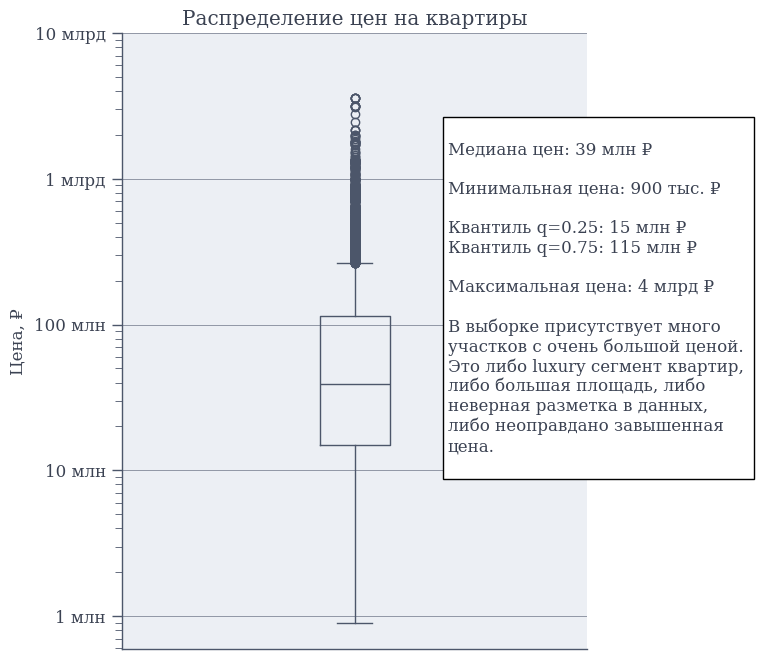

In [10]:
prices_description = df_cian["price"].describe(include="all")

text_for_boxplot = f"""
Медиана цен: {ru_currency_format(prices_description["50%"])}

Минимальная цена: {ru_currency_format(prices_description["min"])}

Квантиль q=0.25: {ru_currency_format(prices_description["25%"])}
Квантиль q=0.75: {ru_currency_format(prices_description["75%"])}

Максимальная цена: {ru_currency_format(prices_description["max"])}

В выборке присутствует много 
участков с очень большой ценой. 
Это либо luxury сегмент квартир, 
либо большая площадь, либо 
неверная разметка в данных,
либо неоправдано завышенная
цена.
"""

plot_info = {
    "title": "Распределение цен на квартиры",
    "xlabel": "",
    "ylabel": "Цена, ₽",
    "text": text_for_boxplot,
}

fig, ax = plt.subplots(figsize=(6, 8))

ax.boxplot(df_cian["price"])

ax.set(
    title=plot_info["title"],
    ylabel=plot_info["ylabel"],
)


ax.annotate(
    plot_info["text"],
    xy=(1.2, 10e6),
    bbox=dict(boxstyle="square", fc="w", alpha=1),
    fontsize=12,
)

ax.xaxis.set_major_locator(mticker.NullLocator())

ax.set_yscale("log")
ax.yaxis.set_major_locator(mticker.LogLocator(base=10, numticks=10))
ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: str(ru_currency_format(x))[:-1])
)
ax.tick_params(axis="y", length=7, width=1, which="major")
ax.tick_params(axis="y", length=5, which="minor")
ax.set_ylim(0, 1e10)

# pdf.savefig(bbox_inches = 'tight')
plt.show()

### Отдельно построим гистограммы распределения цен на квартиры в зависимости от количества комнат.

In [11]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(15, 10),
    # sharey=True,
)

fig.suptitle(
    """Гистограмма распределения цен на квартиры
    в зависимости от числа комнат"""
)


for i in range(2):
    for j in range(3):
        sns.histplot(
            data=df_cian[df_cian["room_count"] == 3 * (i) + (j + 1)]["price"],
            bins=50,
            color=(
                custom_pallete["green"]
                if (3 * (i) + (j + 1)) % 2 == 0
                else custom_pallete["orange"]
            ),
            stat="density",
            alpha=0.2,
            ax=ax[i][j],
            label=f"{3 * (i) + (j + 1)}-комн. квартиры",
        )
        sns.kdeplot(
            data=df_cian[df_cian["room_count"] == 3 * (i) + (j + 1)]["price"],
            color=(
                custom_pallete["orange"]
                if (3 * (i) + (j + 1)) % 2 == 0
                else custom_pallete["green"]
            ),
            label="KDE",
            ax=ax[i][j],
        )
        ax[i][j].legend()
        ax[i][j].set_ylabel("Количество квартир")
        ax[i][j].set_xlabel("Цена, ₽")

plt.show()

### Посмотрим на матрицу корреляций

In [12]:
corr = df_cian[numerical_features].corr()

plt.figure(figsize=(9, 7), dpi=500)

sns.heatmap(
    corr,
    cmap="crest",
    annot=True,
    annot_kws={
        "fontsize": 10,
    },
)

plt.title("Корреляция между численными данными")
plt.grid(False)
plt.xticks(rotation=90)

# pdf.savefig(bbox_inches = 'tight')
plt.show()

Как и предполагалось, цена на квартиру сильнее всего коррелирует с площадью

In [13]:
df_cian["metro"].value_counts().reset_index()

metro  count
0                     Минская    179
1                  Медведково    167
2                    Шелепиха    157
3                  Спортивная    143
4      Ломоносовский проспект    129
..                        ...    ...
317                  Красково      1
318                 Малаховка      1
319                Покровское      1
320           Севастопольская      1
321  Улица Сергея Эйзенштейна      1

[322 rows x 2 columns]

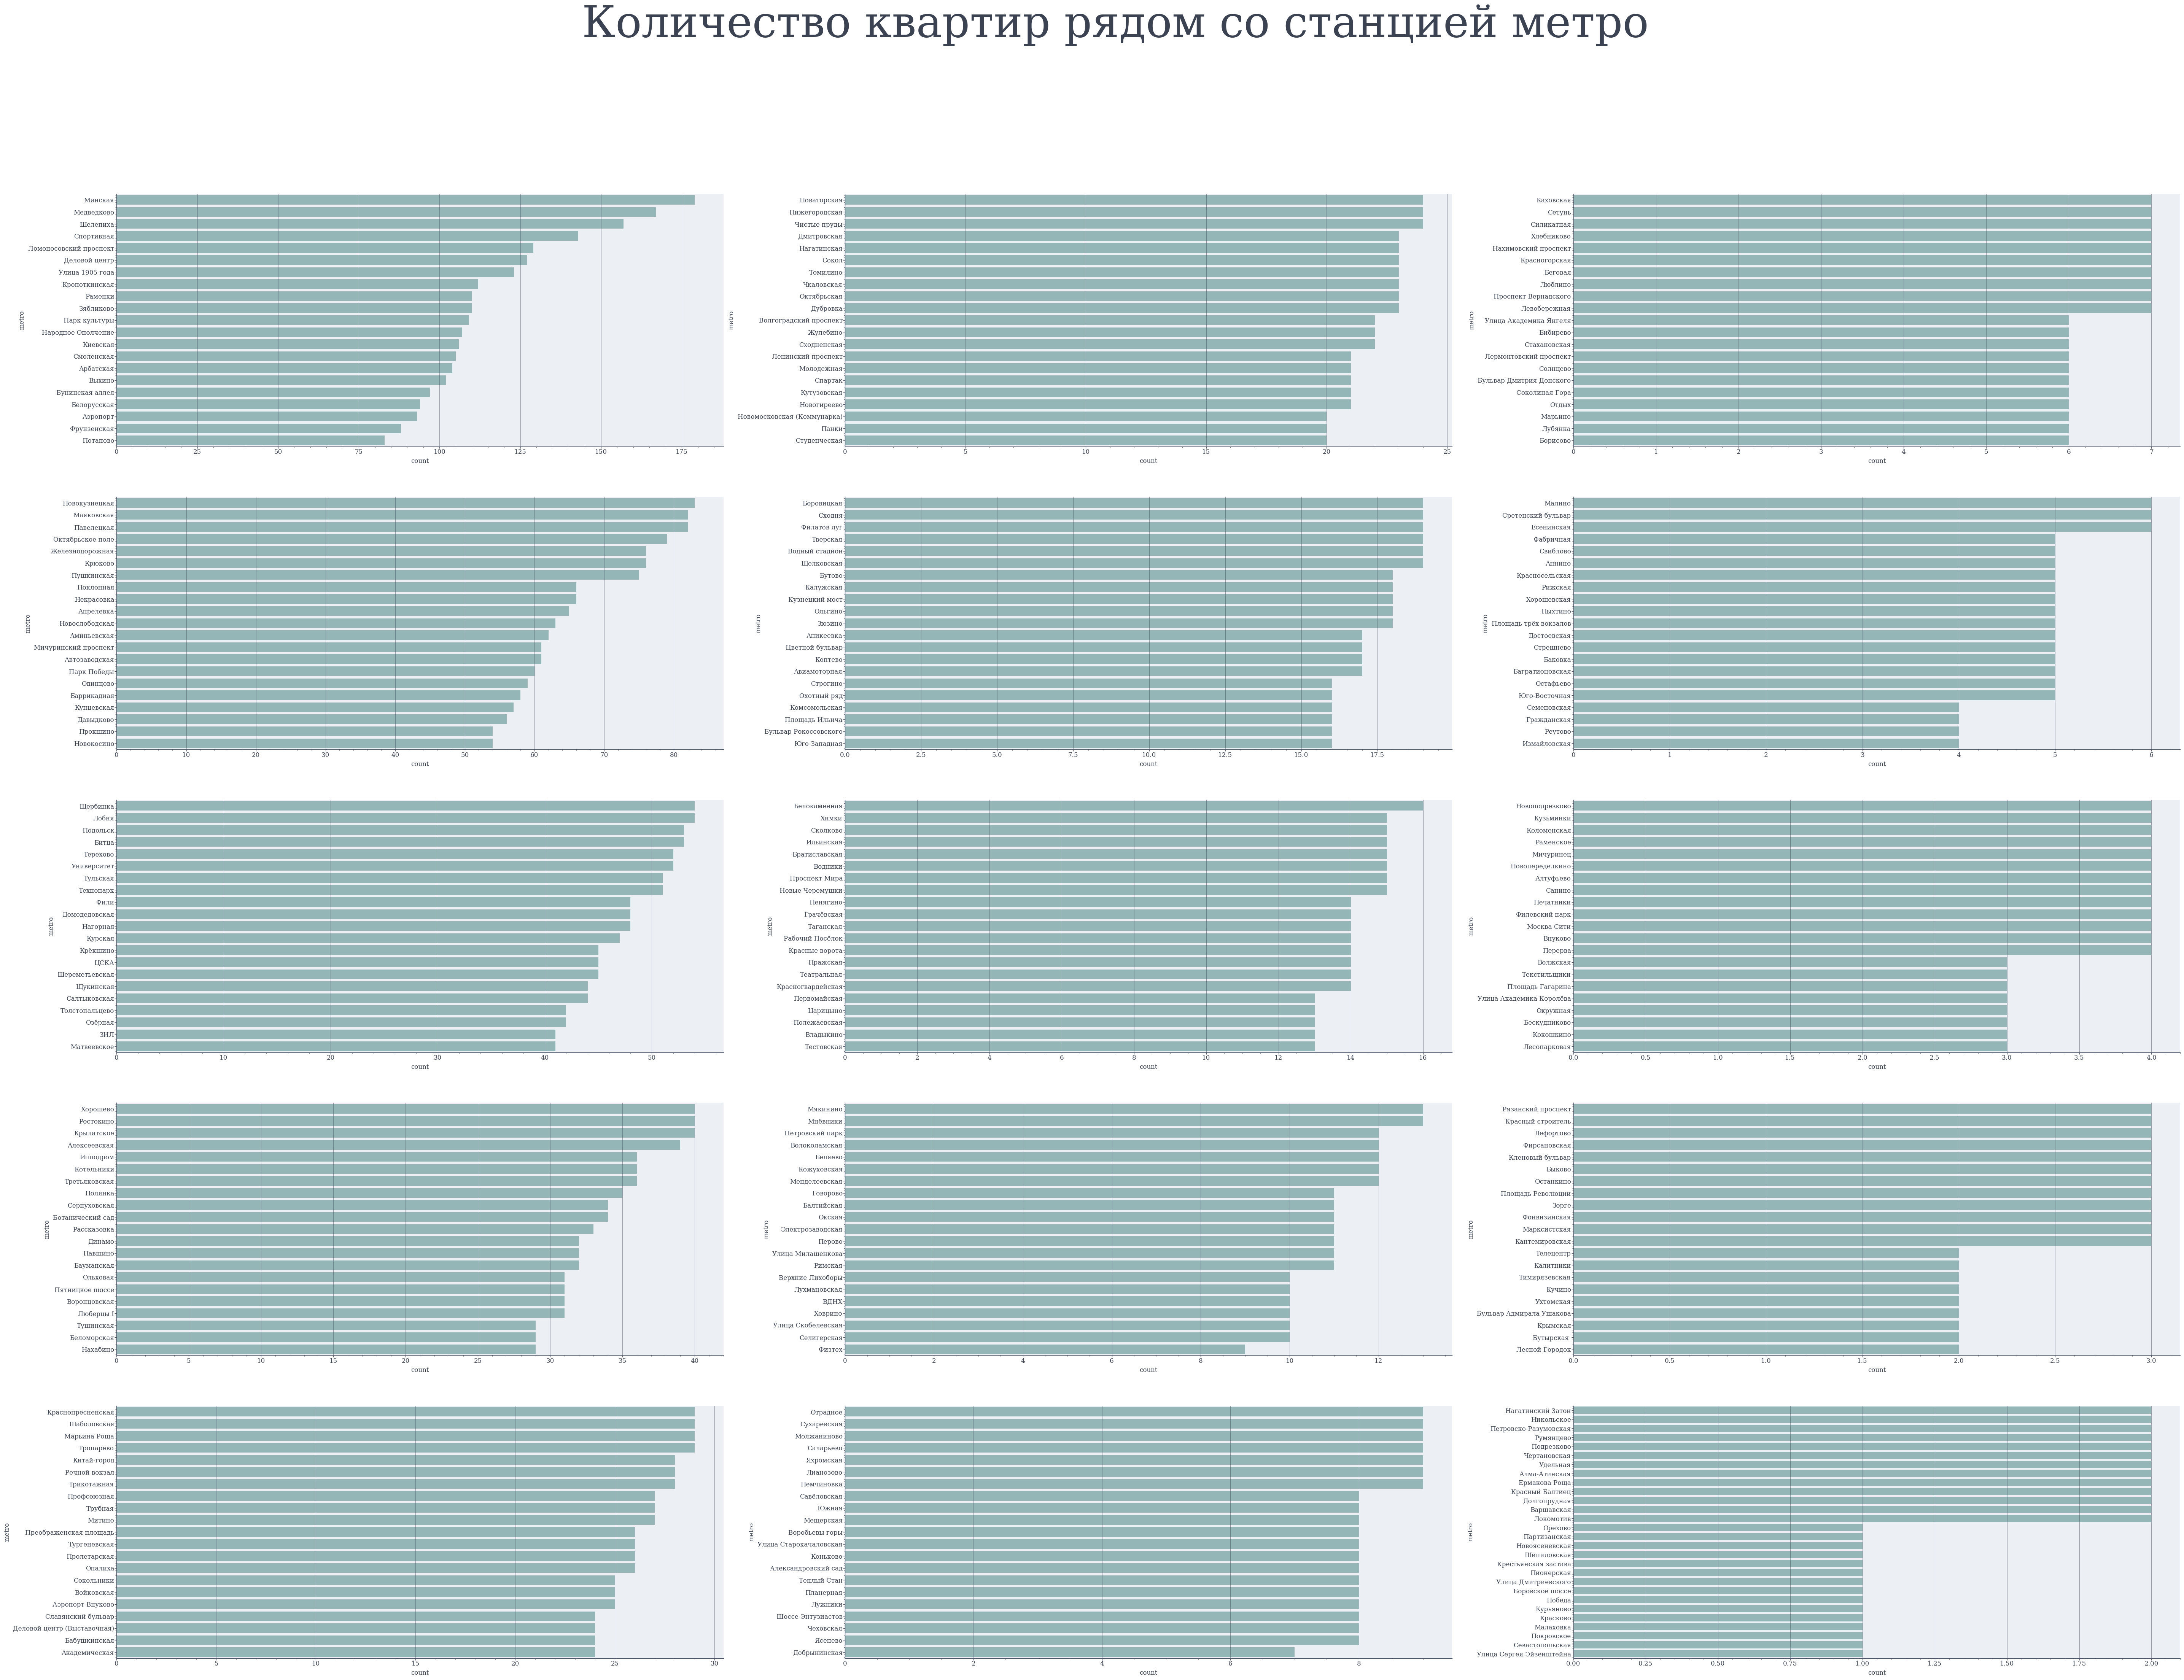

In [14]:
mticker.Locator.MAXTICKS = 2000

fig, ax = plt.subplots(
    nrows=5,
    ncols=3,
    figsize=(70, 50),
)

fig.suptitle("Количество квартир рядом со станцией метро", fontsize=82)

data = df_cian["metro"].value_counts().reset_index()


k = 15
n = data.shape[0] // k


for j in range(3):
    for i in range(5):
        if (i + 5 * j) != k - 1:
            sns.barplot(
                data = data.iloc[(i + 5 * j) * n : (i + 5 * j) * n + n],
                x="count",
                y="metro",
                ax=ax[i, j],
            )
        else:
            sns.barplot(
                data = data.iloc[(i + 5 * j) * n :],
                x="count",
                y="metro",
                ax=ax[i, j],
            )


plt.show()

Больше всего квартрив в продаже в районе метро Минская. Связано это с постройкой новых ЖК в этом районе.

## Площади квартир

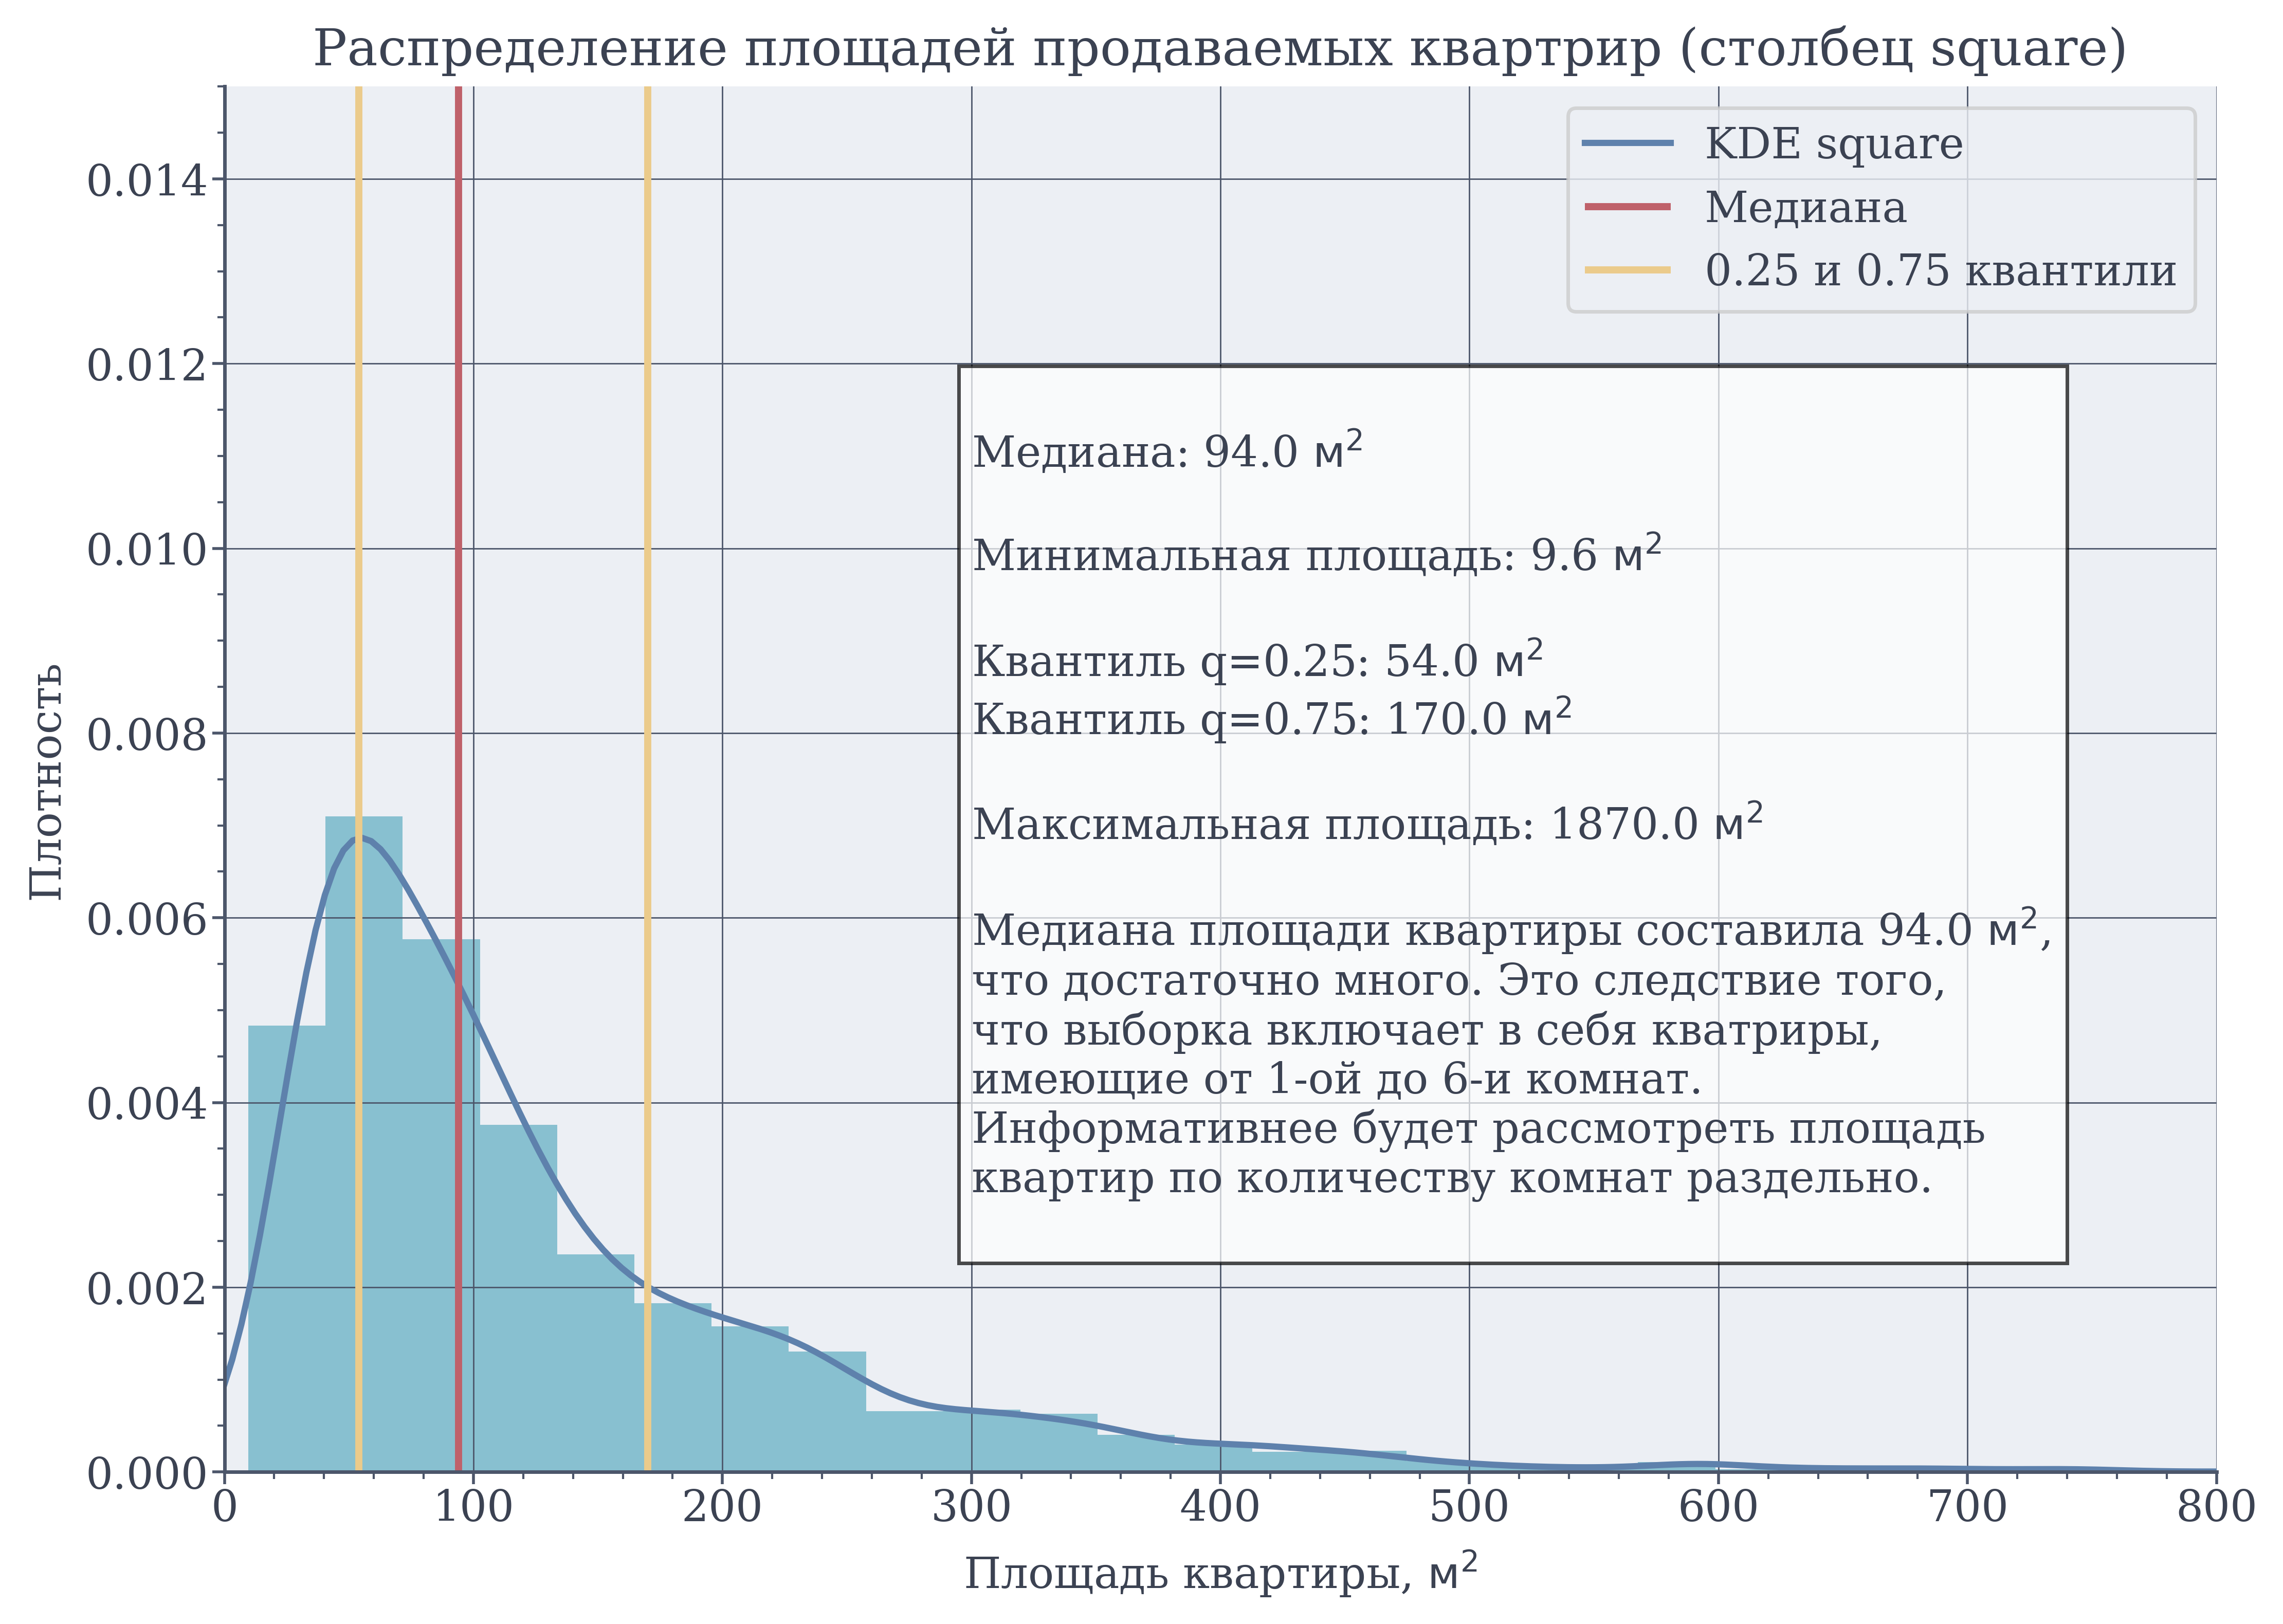

In [15]:
square_description = df_cian["square"].describe(include="all")


m_square = "$\mathrm{м}^2$"
text_for_histplot = f"""
Медиана: {square_description["50%"]} {m_square}

Минимальная площадь: {square_description["min"]} {m_square}

Квантиль q=0.25: {square_description["25%"]} {m_square}
Квантиль q=0.75: {square_description["75%"]} {m_square}

Максимальная площадь: {square_description["max"]} {m_square}
"""
text_for_histplot = text_for_histplot + f"""
Медиана площади квартиры составила {square_description["50%"]} {m_square}, 
что достаточно много. Это следствие того, 
что выборка включает в себя кватриры,
имеющие от 1-ой до 6-и комнат. 
Информативнее будет рассмотреть площадь
квартир по количеству комнат раздельно.
"""

plot_info = {
    "title": "Распределение площадей продаваемых квартрир (столбец square)",
    "xlabel": f"Площадь квартиры, {m_square}",
    "ylabel": "Плотность",
    "text": text_for_histplot,
}

plt.figure(figsize=(10, 7), dpi=500)

plt.hist(
    df_cian["square"],
    bins=60,
    density=True,
    color=custom_pallete["light_gray_blue"],
)
df_cian["square"].plot.kde(color=custom_pallete["blue"], label="KDE square")

plt.vlines(
    x=square_description["50%"],
    ymax=1,
    ymin=0,
    colors=custom_pallete["red"],
    linewidth=2,
    label="Медиана"
)

plt.vlines(
    x=(
        square_description["25%"],
        square_description["75%"],
    ),
    ymax=1,
    ymin=0,
    colors=custom_pallete["yellow"],
    linewidth=2,
    label="0.25 и 0.75 квантили"
)

plt.annotate(
    plot_info["text"],
    xy=(300, 2.5e-3),
    bbox=dict(boxstyle="square", fc="w", alpha=0.7),
    fontsize=12,
)

plt.xlabel(plot_info["xlabel"])
plt.ylabel(plot_info["ylabel"])


plt.xlim(0, 800)
plt.ylim(0, 1.5e-2)

plt.title(plot_info["title"])
plt.legend()

# pdf.savefig(bbox_inches = 'tight')
plt.show()


Данное распределение тоже похоже на логнормальное, собственно по тем же соображениям, что и для цен на квартиры.

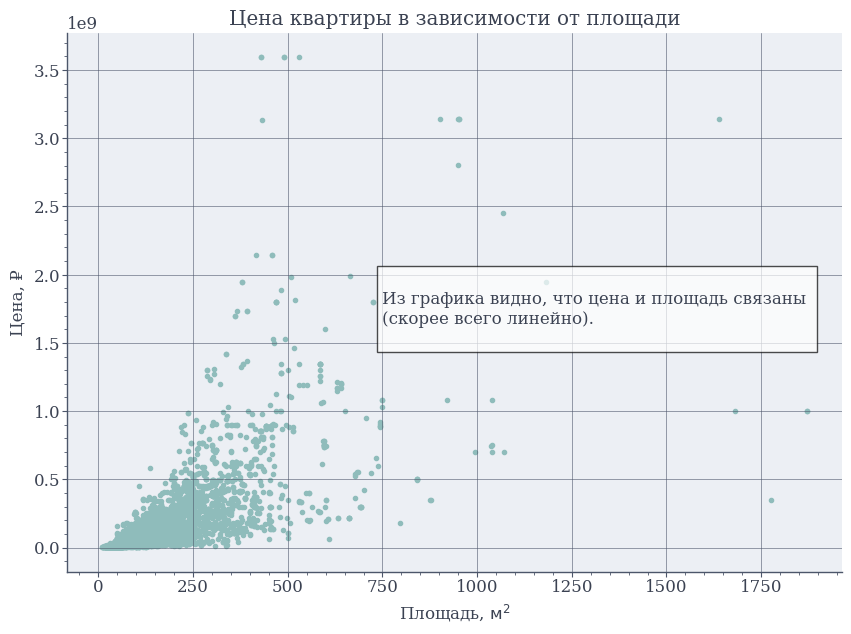

In [16]:
text_for_scatterplot = f"""
Из графика видно, что цена и площадь связаны 
(скорее всего линейно).
"""

plot_info = {
    "title": "Цена квартиры в зависимости от площади",
    "xlabel": "Площадь, $\\mathrm{м}^2$",
    "ylabel": "Цена, ₽",
    "text": text_for_scatterplot,
}

fig, ax = plt.subplots(figsize=(10, 7))  # , dpi=500)


ax.scatter(df_cian["square"], df_cian["price"], s=9)
ax.set(
    title=plot_info["title"],
    xlabel=plot_info["xlabel"],
    ylabel=plot_info["ylabel"],
)

ax.annotate(
    plot_info["text"],
    xy=(750, 1.5e9),
    bbox=dict(boxstyle="square", fc="w", alpha=0.7),
    fontsize=12,
    alpha=1,
)

# pdf.savefig(bbox_inches = 'tight')
plt.show()

> Аналогичные графики можно получить и для зависимости цены от площади кухни или жилой площади

Разобъем датасет по количеству комнат и посмотрим на распределение площадей в зависимости от количества комнат.

In [17]:
df_cian_1_room = df_cian[df_cian["room_count"] == 1]
df_cian_2_room = df_cian[df_cian["room_count"] == 2]
df_cian_3_room = df_cian[df_cian["room_count"] == 3]
df_cian_4_room = df_cian[df_cian["room_count"] == 4]
df_cian_5_room = df_cian[df_cian["room_count"] == 5]
df_cian_6_room = df_cian[df_cian["room_count"] == 6]

Функция отрисовки

In [18]:
def histplot_square(
    df_cian_n_room: pd.DataFrame,
    desctiption: str = "",
    bins: int = 50,
    xy: tuple = (0, 0),
    xlim: tuple = (0, 100),
    ylim: tuple = (0, 1),
):
    square_description = df_cian_n_room["square"].describe(include="all")
    m_square = "$\mathrm{м}^2$"
    text_for_histplot = f"""
    Медиана: {square_description["50%"]} {m_square}

    Минимальная площадь: {square_description["min"]} {m_square}

    Квантиль q=0.25: {square_description["25%"]} {m_square}
    Квантиль q=0.75: {square_description["75%"]} {m_square}

    Максимальная площадь: {square_description["max"]} {m_square}
    """
    text_for_histplot = text_for_histplot + desctiption

    plot_info = {
        "title": f"Распределение площадей {df_cian_n_room["room_count"].values[0]}-комн. квартир",
        "xlabel": f"Площадь квартиры, {m_square}",
        "ylabel": "Плотность",
        "text": text_for_histplot,
    }

    plt.figure(figsize=(10, 7), dpi=500)

    plt.hist(
        df_cian_n_room["square"],
        bins=bins,
        density=True,
        color=custom_pallete["light_gray_blue"],
    )
    df_cian_n_room["square"].plot.kde(color=custom_pallete["blue"], label="KDE square")

    plt.vlines(
        x=square_description["50%"],
        ymax=1,
        ymin=0,
        colors=custom_pallete["red"],
        linewidth=2,
        label="Медиана",
    )

    plt.vlines(
        x=(
            square_description["25%"],
            square_description["75%"],
        ),
        ymax=1,
        ymin=0,
        colors=custom_pallete["yellow"],
        linewidth=2,
        label="0.25 и 0.75 квантили",
    )

    plt.annotate(
        plot_info["text"],
        xy=xy,
        bbox=dict(boxstyle="square", fc="w", alpha=0.7),
        fontsize=12,
    )

    plt.xlabel(plot_info["xlabel"])
    plt.ylabel(plot_info["ylabel"])

    plt.xlim(*xlim)
    plt.ylim(*ylim)

    plt.title(plot_info["title"])
    plt.legend()

    # pdf.savefig(bbox_inches = 'tight')
    plt.show()

### 1-комн

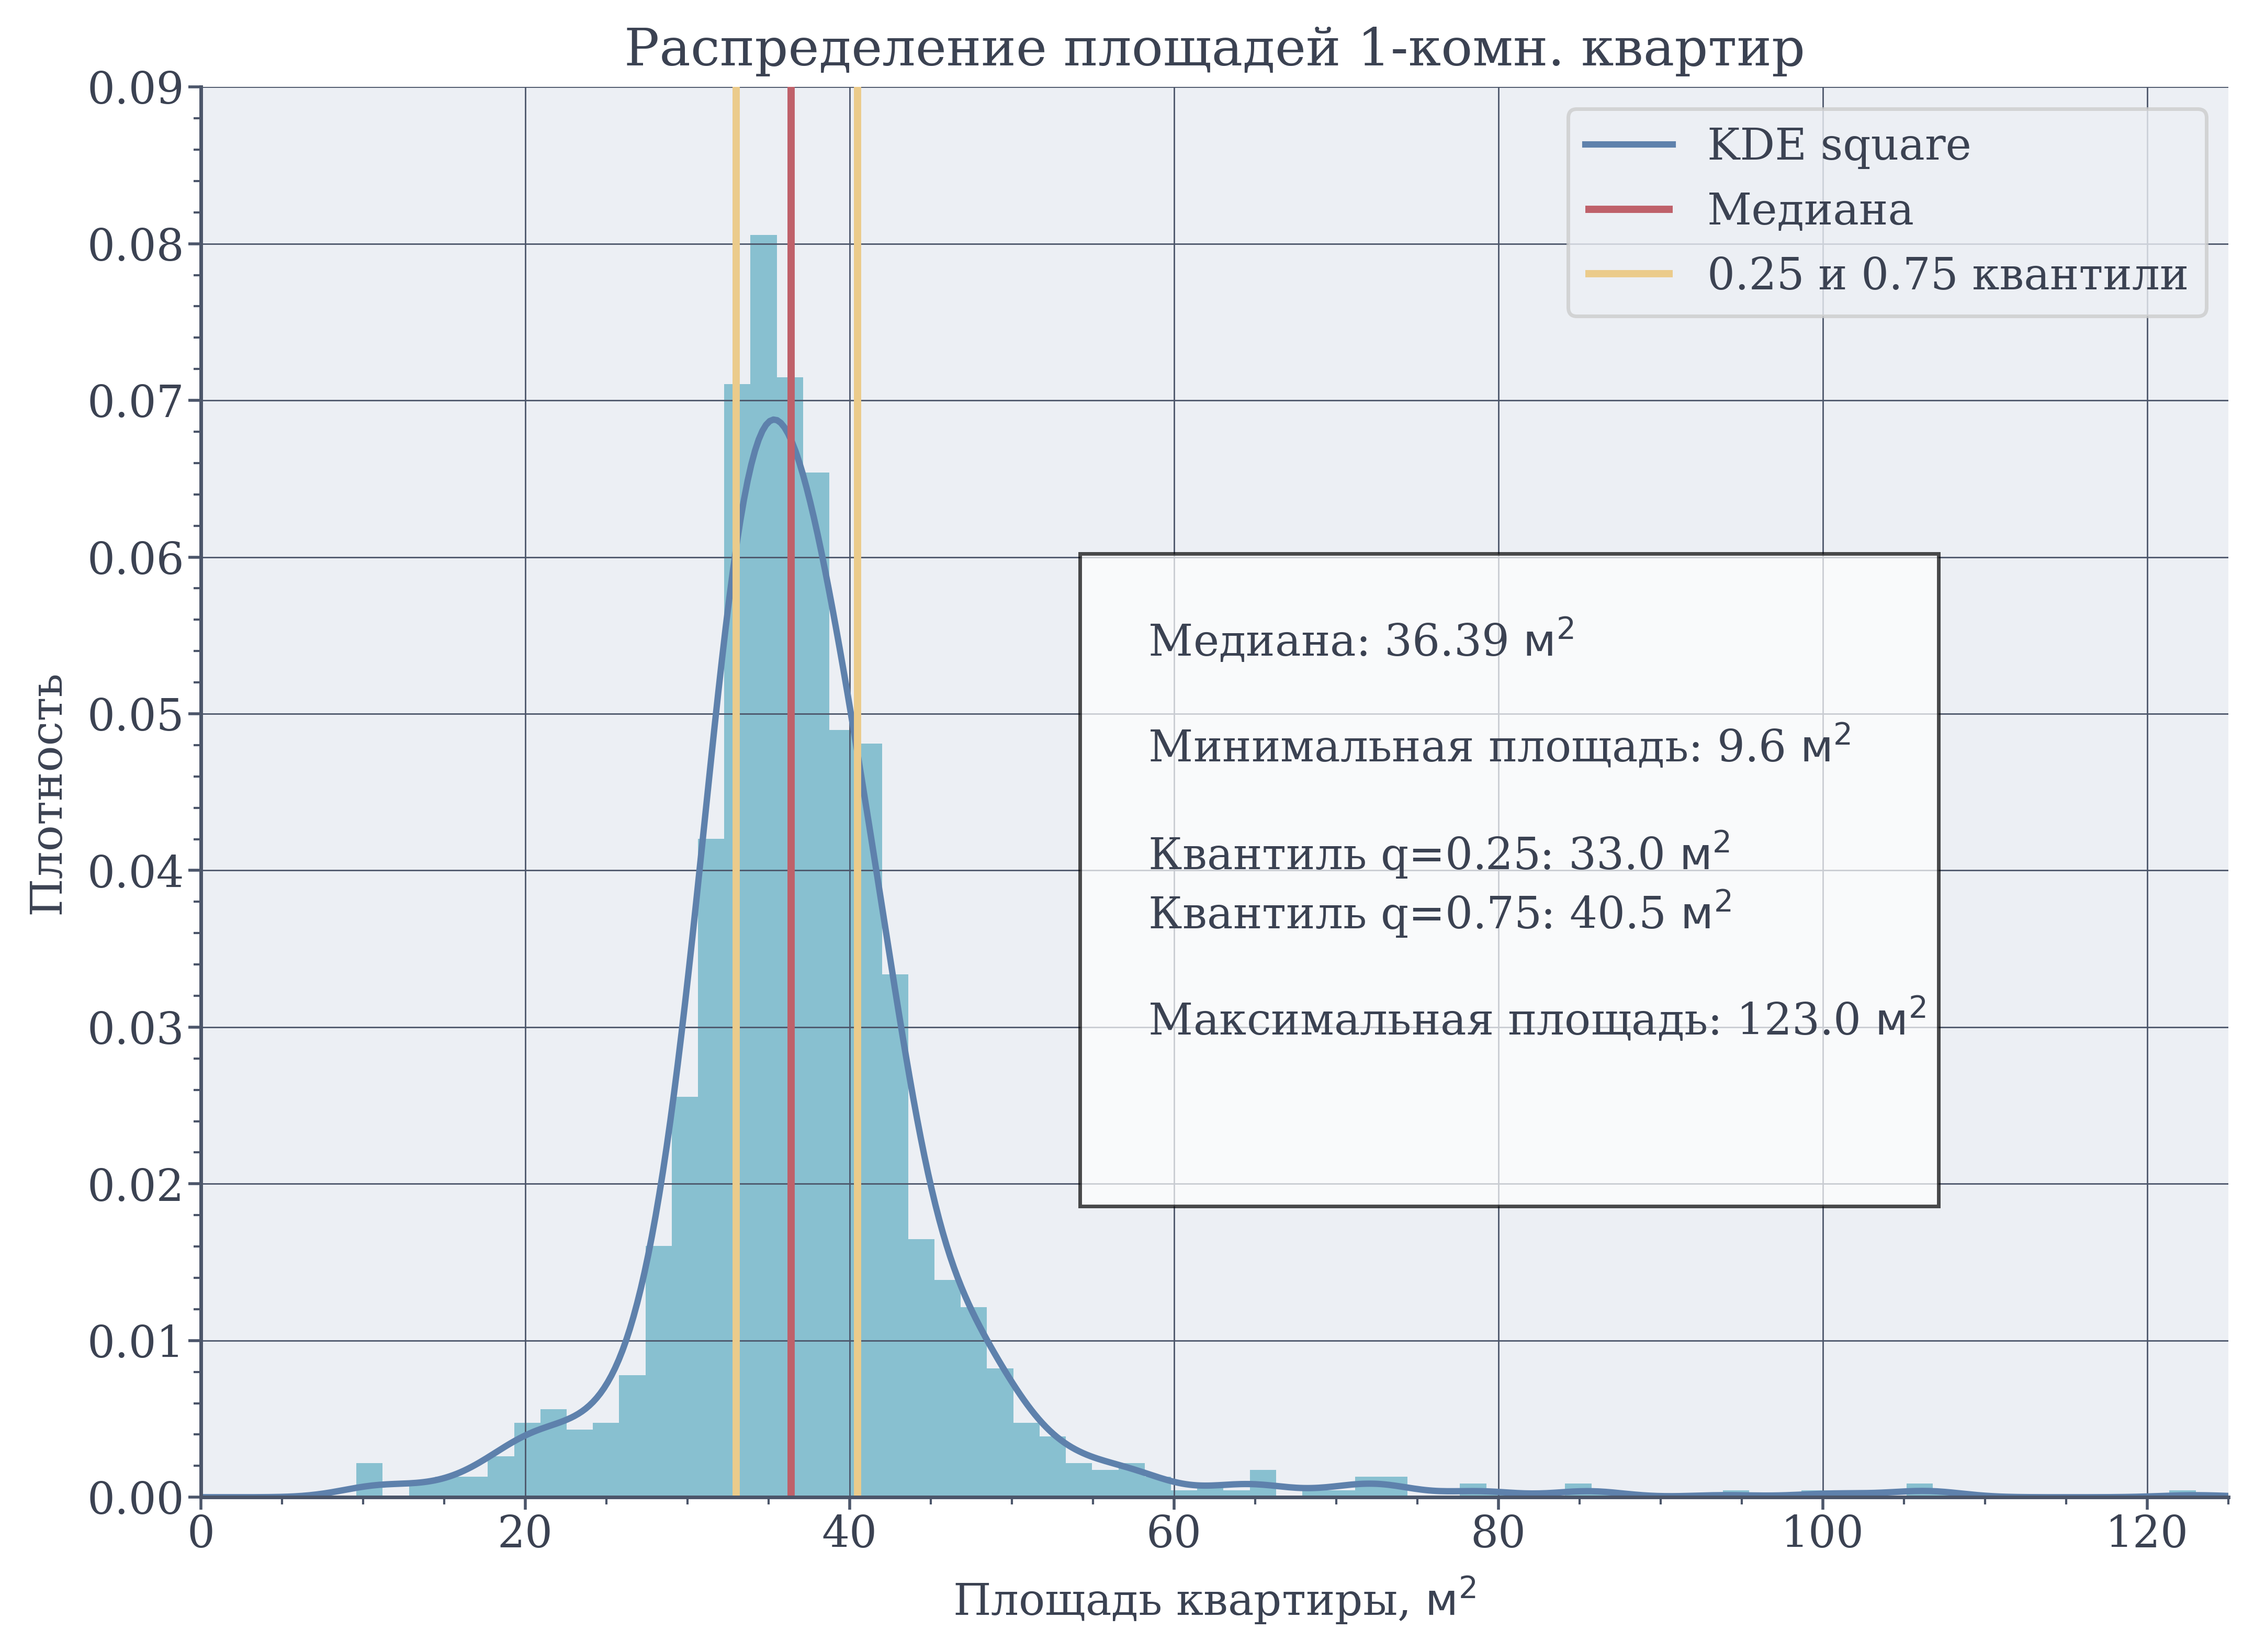

In [19]:
histplot_square(
    df_cian_1_room,
    bins=70,
    xy=(55, 0.02),
    xlim=(0, 125),
    ylim=(0, 0.9e-1),
    desctiption="""
    
    """,
)

### 2-комн

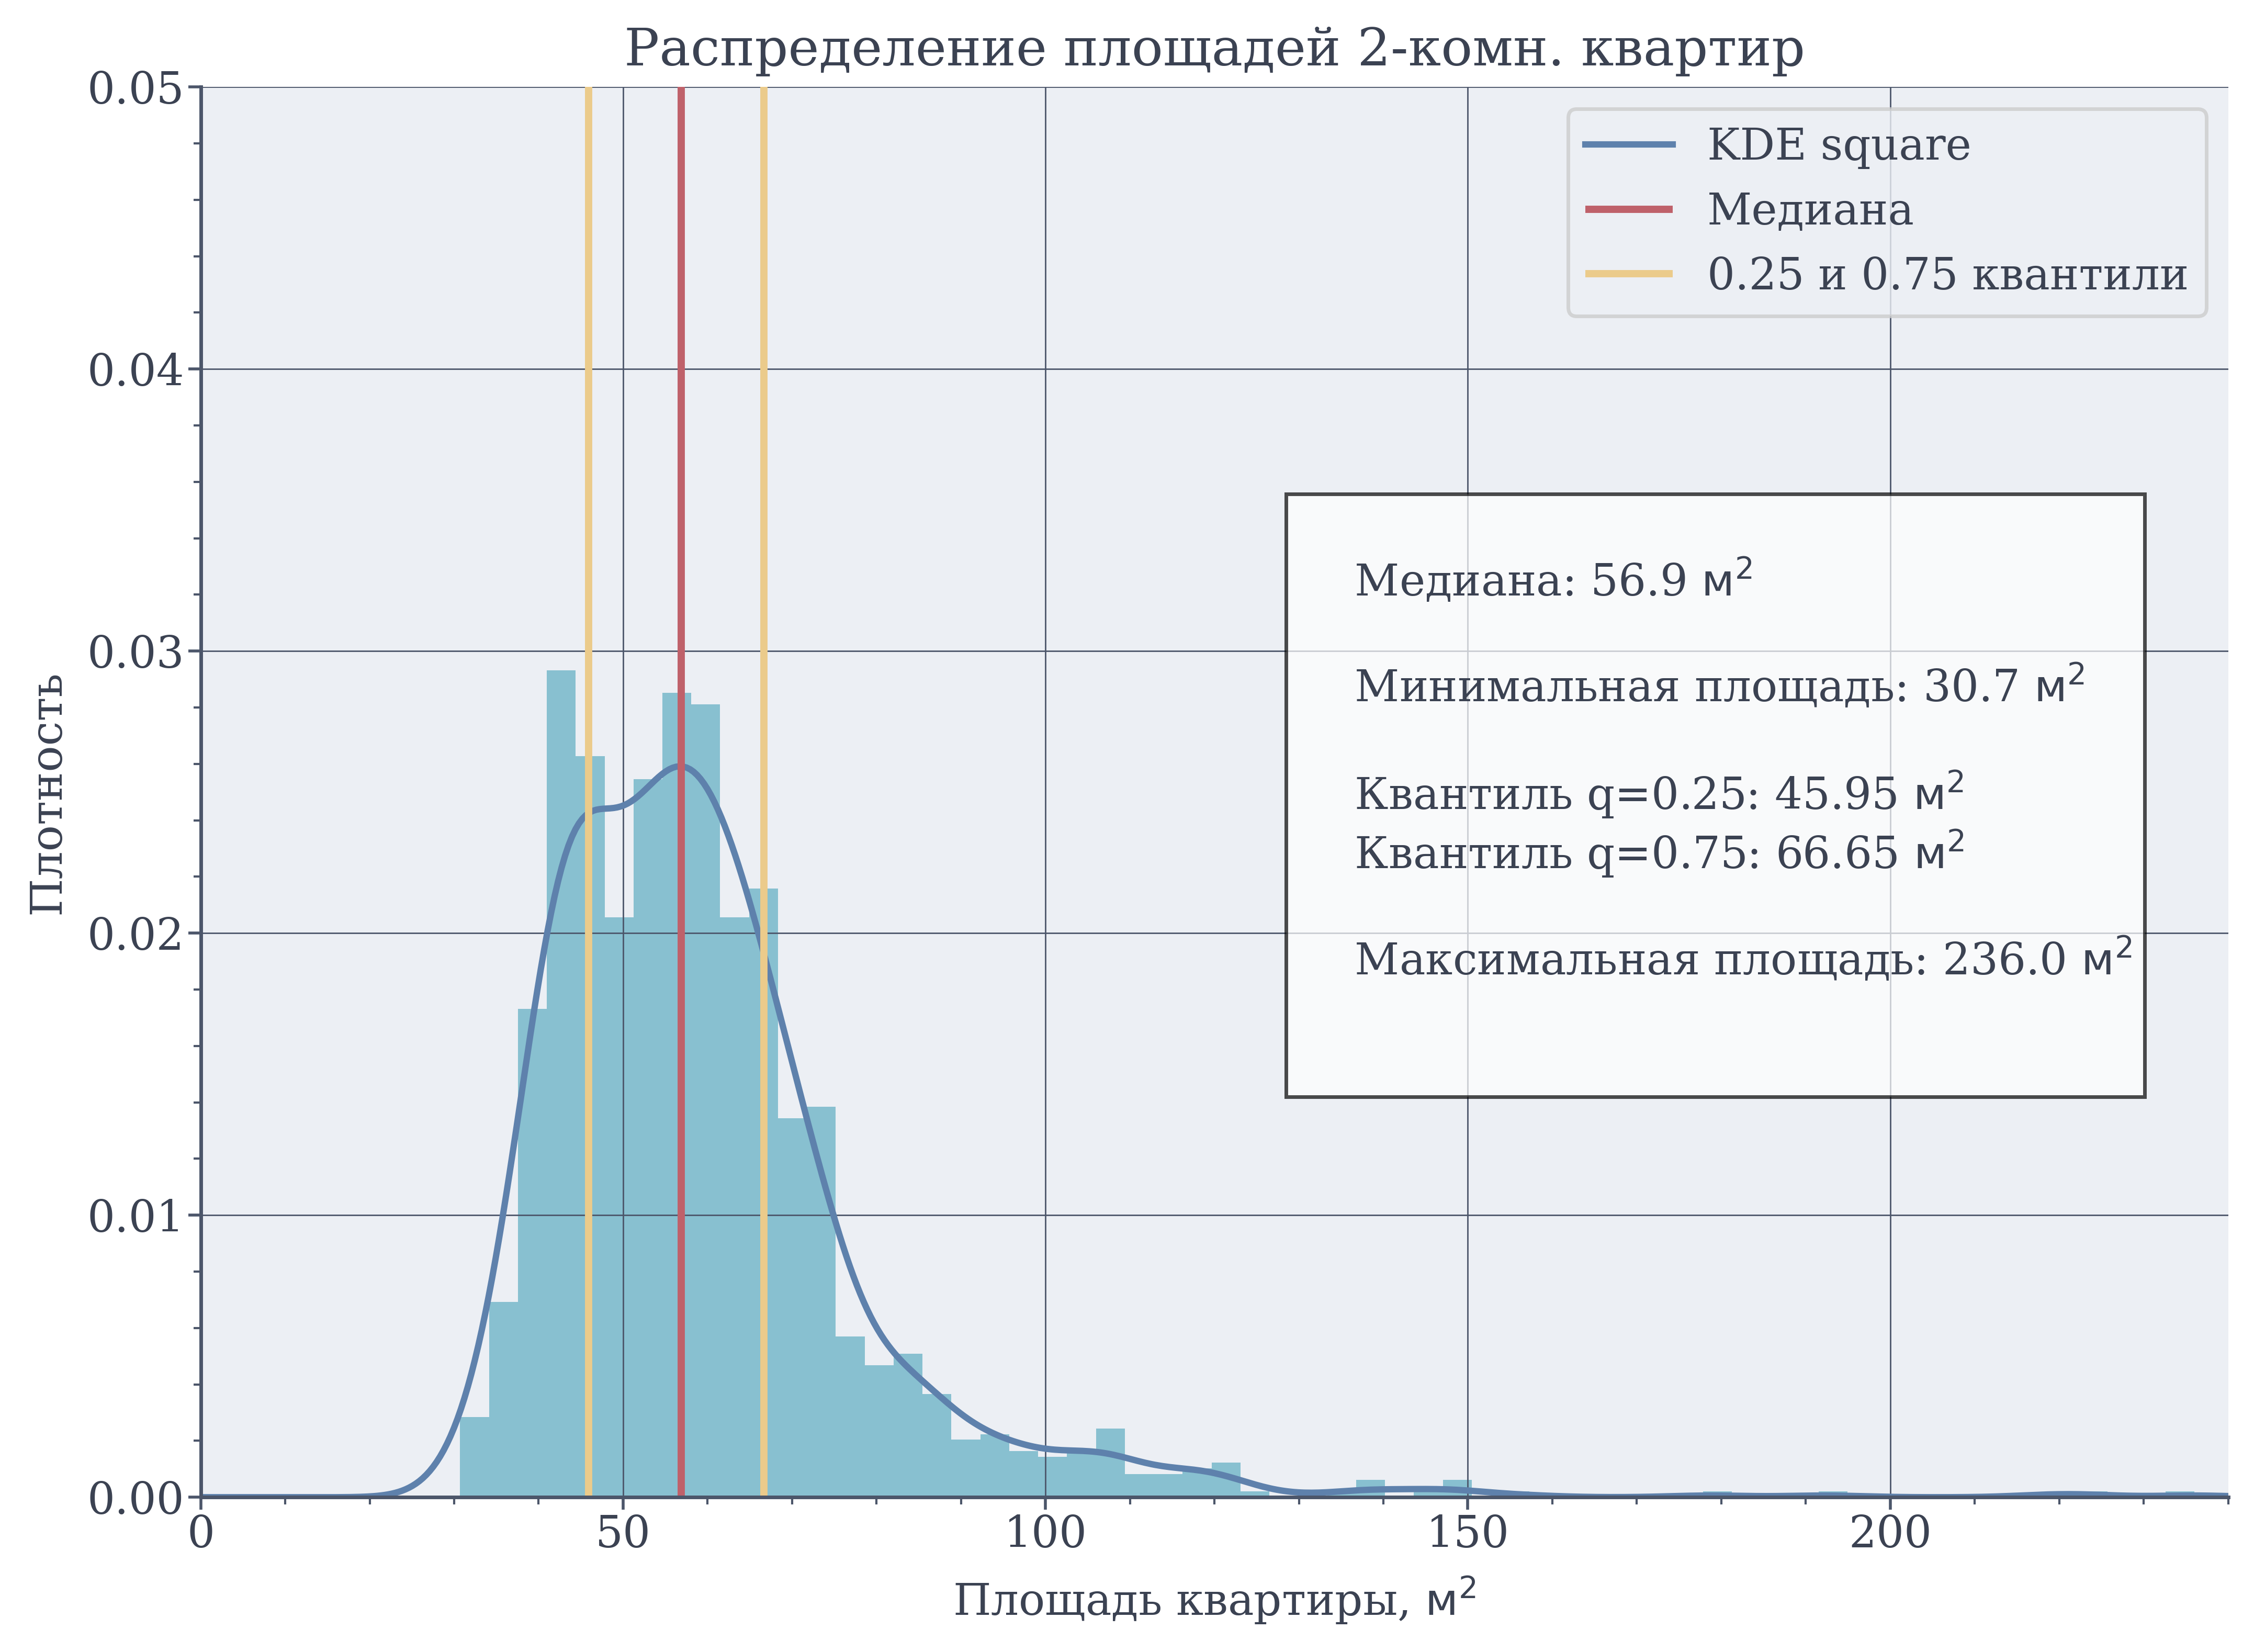

In [20]:
histplot_square(
    df_cian_2_room,
    bins=60,
    xy=(130, 0.015),
    xlim=(0, 240),
    ylim=(0, 0.5e-1),
    desctiption="""
    """,
)

### 3-комн

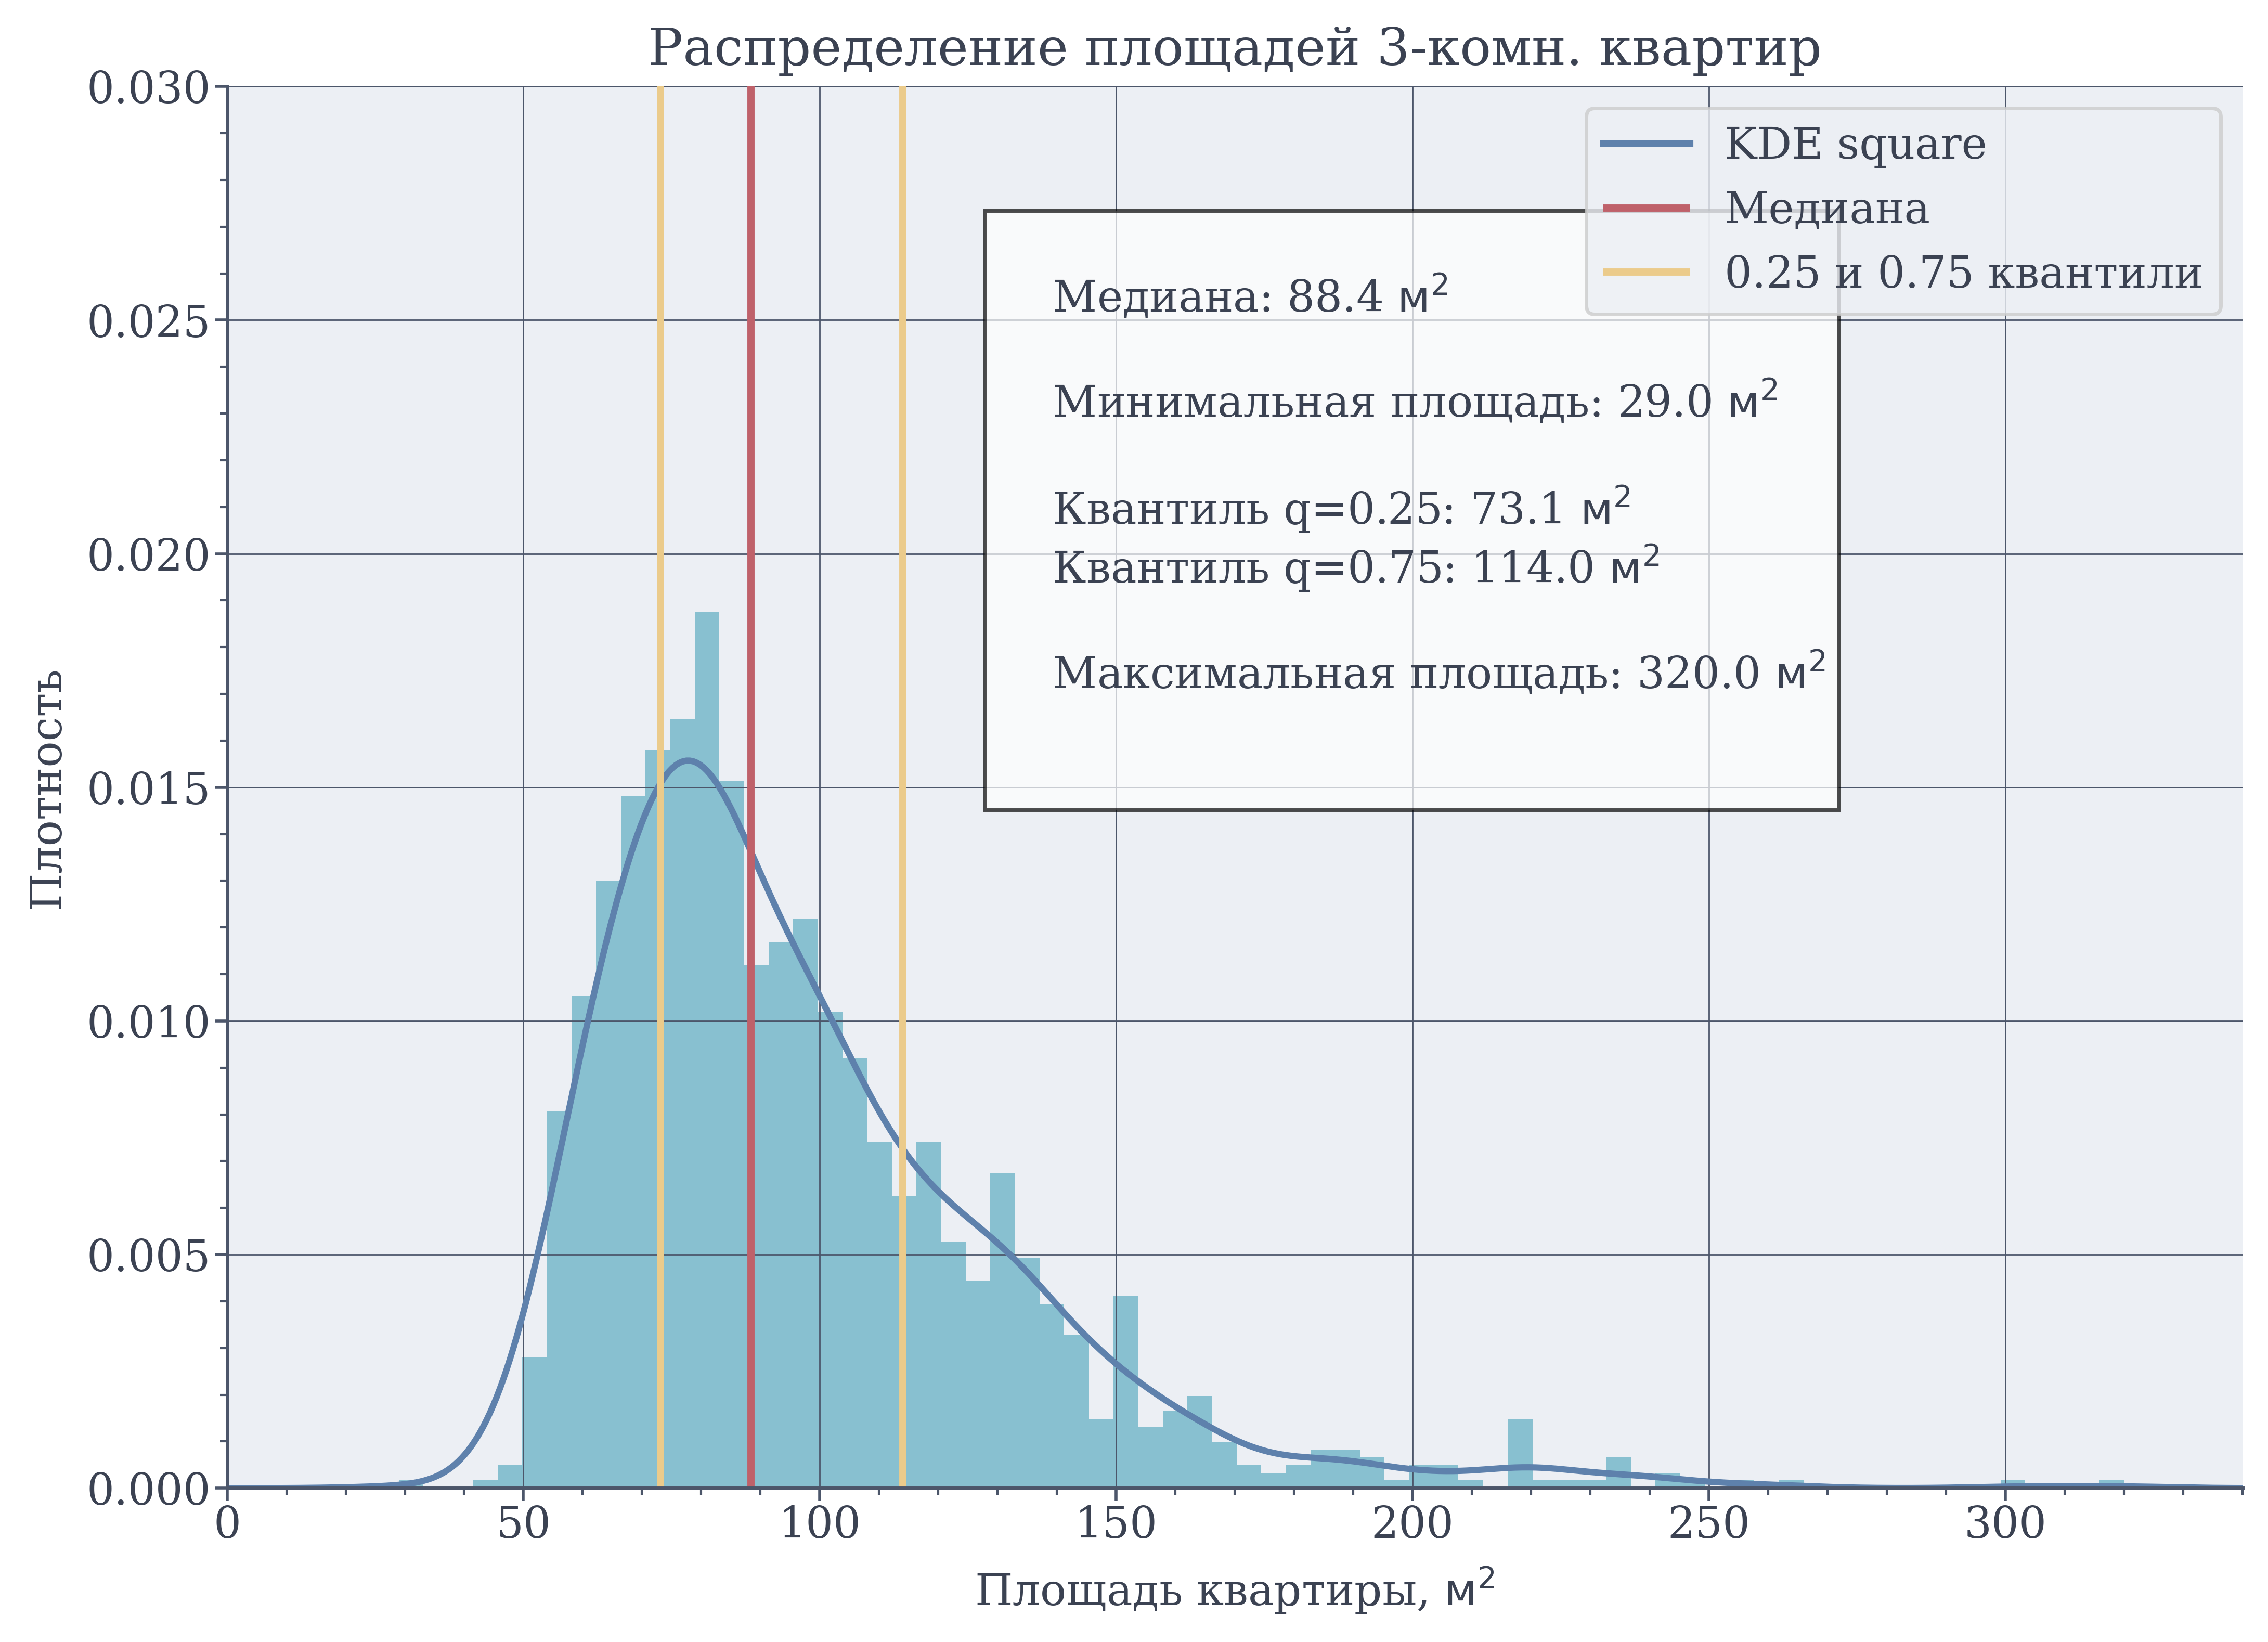

In [21]:
histplot_square(
    df_cian_3_room,
    bins=70,
    xy=(130, 0.015),
    xlim=(0, 340),
    ylim=(0, 0.3e-1),
    desctiption="""
    """,
)

### 4-комн

In [22]:
histplot_square(
    df_cian_4_room,
    bins=50,
    xy=(220, 0.005),
    xlim=(0, 460),
    ylim=(0, 0.2e-1),
    desctiption="""
    """,
)

### 5-комн

In [23]:
histplot_square(
    df_cian_5_room,
    bins=40,
    xy=(220, 0.005),
    xlim=(0, 695),
    ylim=(0, 0.1e-1),
    desctiption="""
    """,
)

### 6-комн

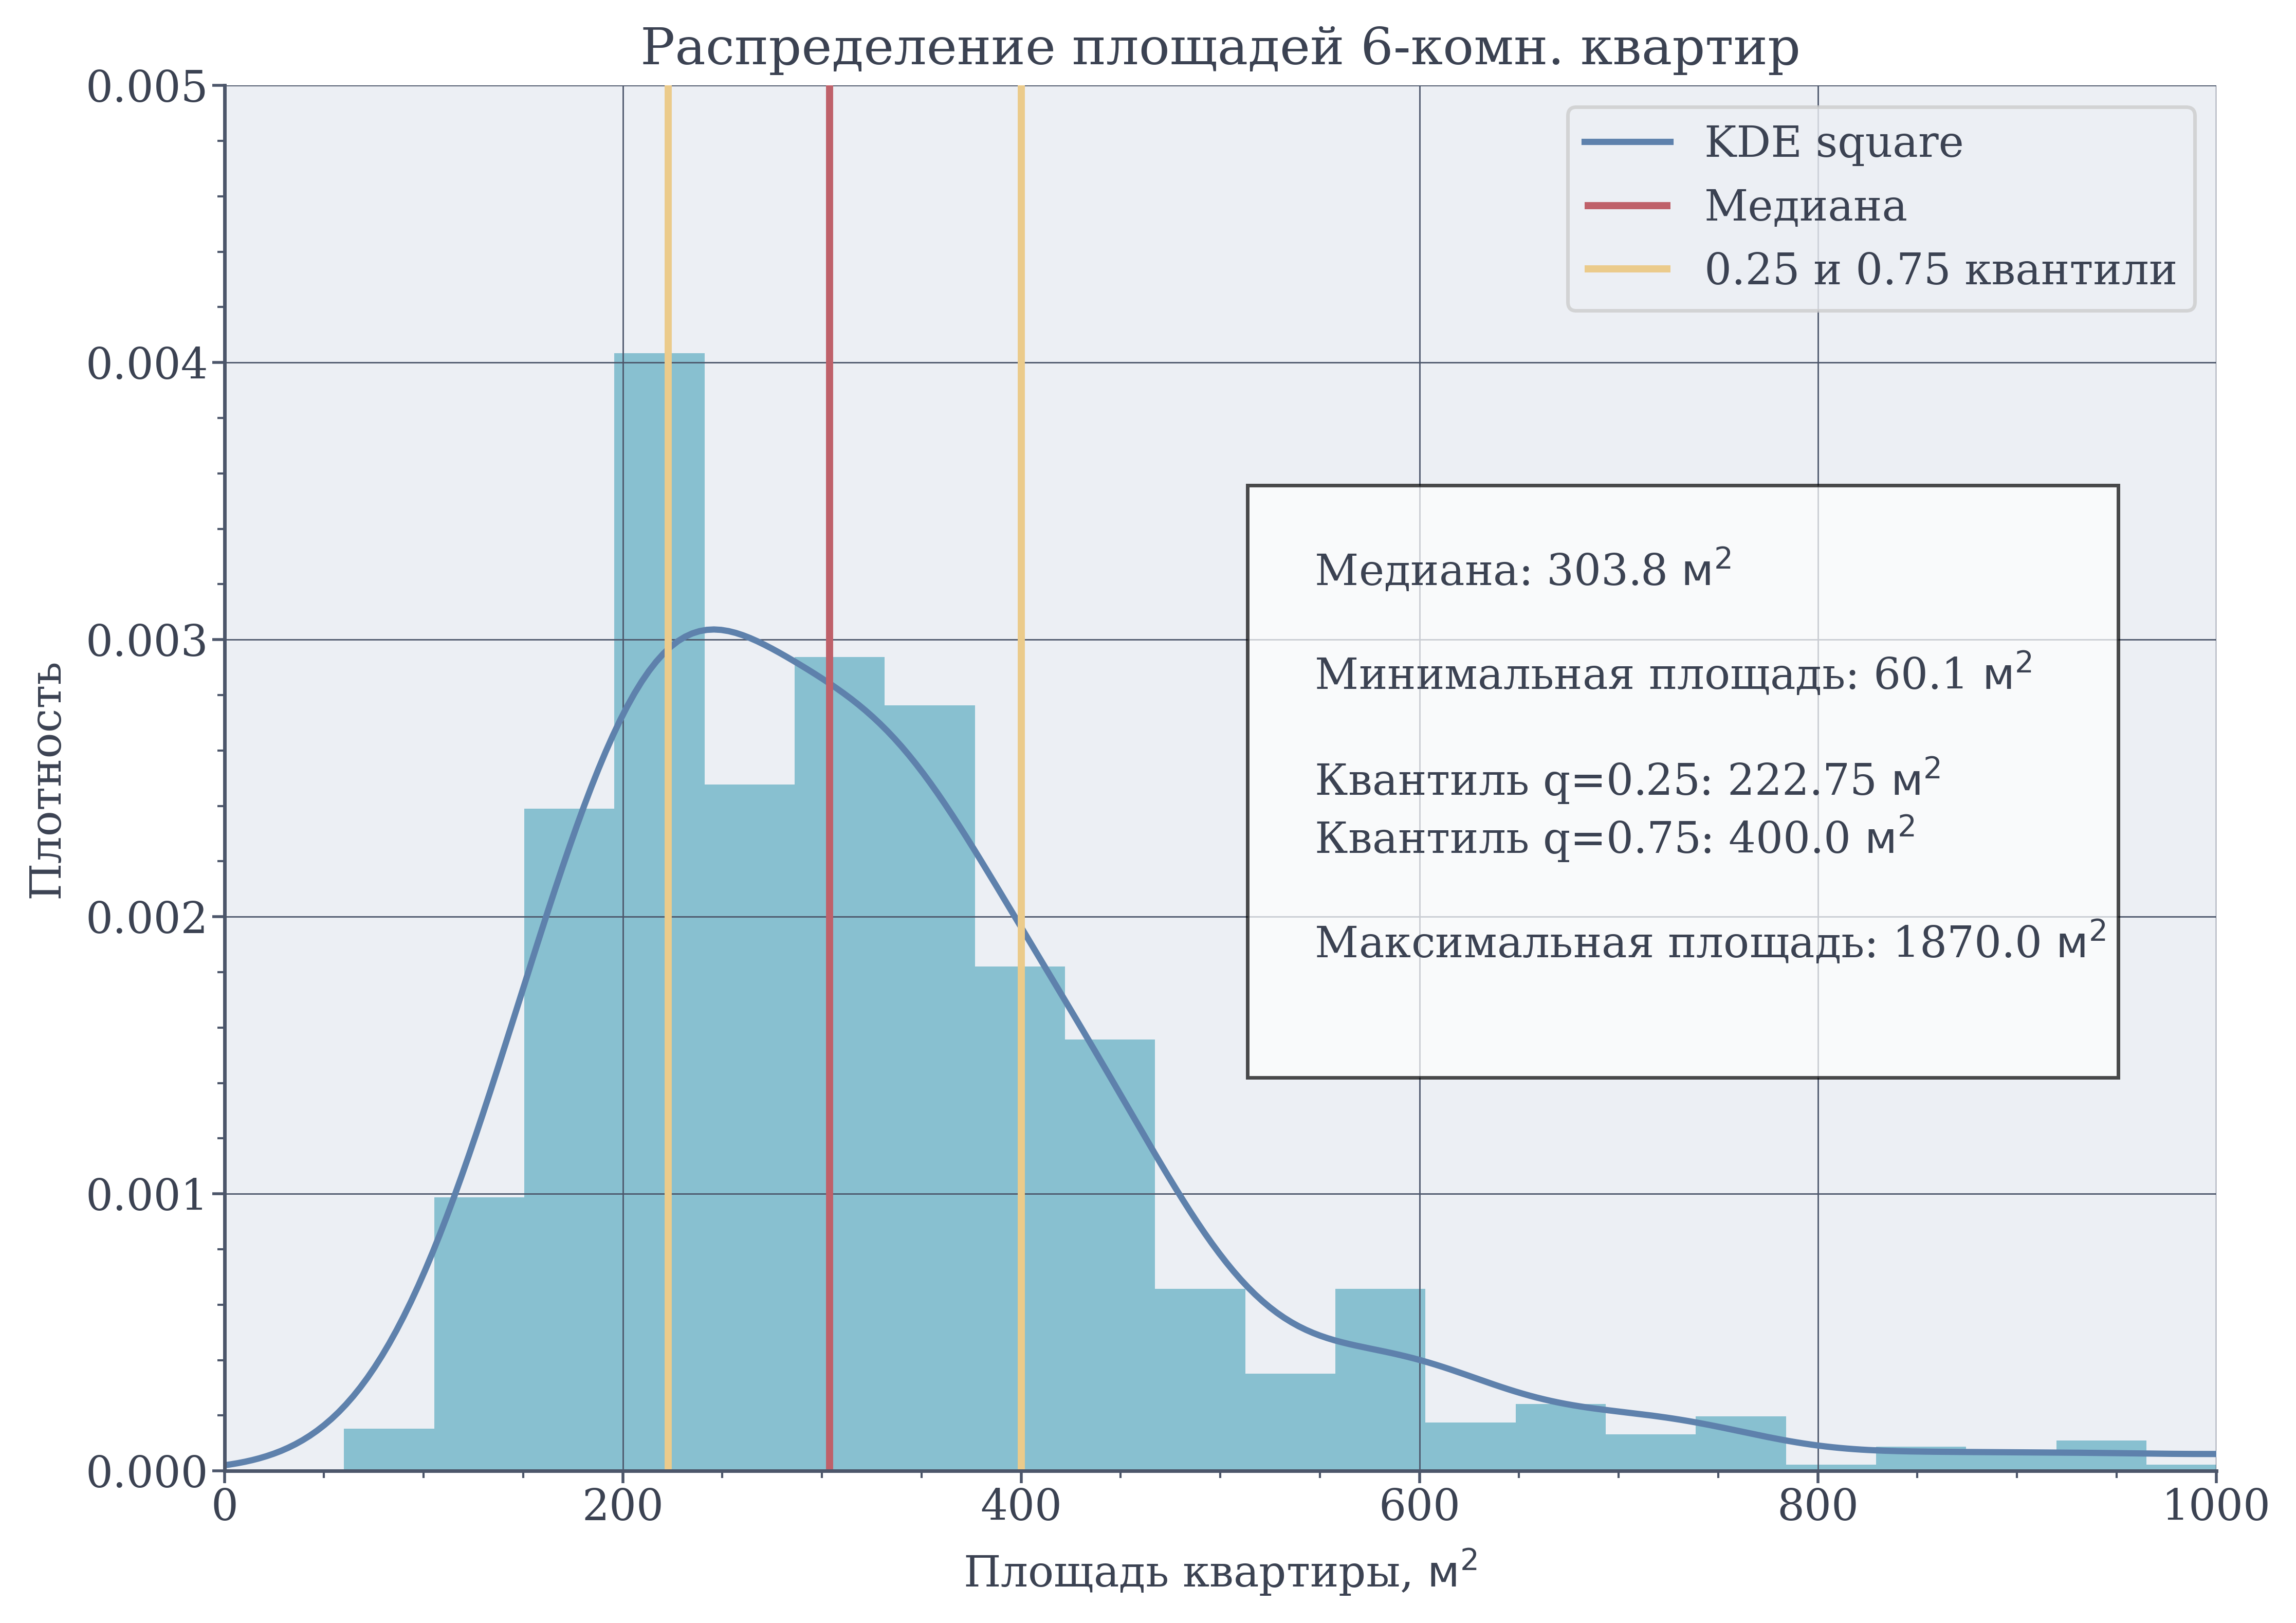

In [24]:
histplot_square(
    df_cian_6_room,
    bins=40,
    xy=(520, 0.0015),
    xlim=(0, 1000),
    ylim=(0, 0.05e-1),
    desctiption="""
    """,
)

## Матрица корреляций

Хочется еще раз взглянуть на матрицу корреляций, но уже в зависимости от всех численных переменных: в численные сейчас не входят столбцы `living_square`, `kitchen_square`, `ceiling_height`. Построим две матрицы корреляций:
- исключив данные с неизвестными значениями
- заполнив неизвестные значения

### Исключая данные с неизвестными значениями

In [25]:
tmp = df_cian[
    (df_cian["living_square"] != "unknown")
    & (df_cian["kitchen_square"] != "unknown")
    & (df_cian["ceiling_height"] != "unknown")
]
tmp["living_square"] = tmp["living_square"].apply(float)
tmp["kitchen_square"] = tmp["kitchen_square"].apply(float)
tmp["ceiling_height"] = tmp["ceiling_height"].apply(float)

tmp.head()

price                                           location    geo_lat  \
4   17119620  Москва, ЮАО, р-н Даниловский, Автозаводская ул...  55.706597   
5    7550000  Москва, НАО (Новомосковский), Филимонковское п...  55.551456   
12  78259545   Москва, ЦАО, р-н Пресненский, ул. Костикова, 4к1  55.761285   
14  11900000  Москва, СВАО, р-н Отрадное, Юрловский проезд, ...  55.877788   
19  27000000  Москва, СЗАО, р-н Хорошево-Мневники, Шелепихин...  55.764496   

      geo_lng            metro  floor  floor_count  square  living_square  \
4   37.632285         Тульская      6           20   38.82           10.6   
5   37.339499      Филатов луг      2            5   30.00           15.0   
12  37.557301  Улица 1905 года      5           21   65.90           18.8   
14  37.613566         Бибирево      8           17   37.00           19.0   
19  37.511490         Шелепиха      6           42   42.00           17.0   

    kitchen_square  ... ceiling_height             view  house_type  \
4             18.6  ...           2.85          Во двор  Монолитный   
5              9.0  ...           2.80          Во двор     unknown   
12            24.9  ...           3.00         На улицу  Монолитный   
14             7.1  ...           2.74  На улицу и двор   Панельный   
19            11.0  ...           3.20          Во двор     unknown   

                 heating breakdown  parking accomodation_type   author  \
4                unknown   unknown  unknown       Новостройка  unknown   
5         Нет информации       Нет  unknown          Вторичка  unknown   
12               unknown   unknown  unknown       Новостройка   VESPER   
14  Автономная котельная       Нет  unknown          Вторичка  unknown   
19        Нет информации       Нет  unknown          Вторичка  unknown   

                                         url room_count  
4   https://www.cian.ru/sale/flat/305679800/          1  
5   https://www.cian.ru/sale/flat/306451520/          1  
12  https://www.cian.ru/sale/flat/306541560/          1  
14  https://www.cian.ru/sale/flat/303859491/          1  
19  https://www.cian.ru/sale/flat/307014462/          1  

[5 rows x 22 columns]

In [26]:
numerical_features_tmp = [f for f in tmp.columns if tmp.dtypes[f] != "object"]
# categorical_features = [f for f in tmp.columns if tmp.dtypes[f] == "object"]
numerical_features_tmp

['price',
 'geo_lat',
 'geo_lng',
 'floor',
 'floor_count',
 'square',
 'living_square',
 'kitchen_square',
 'ceiling_height',
 'room_count']

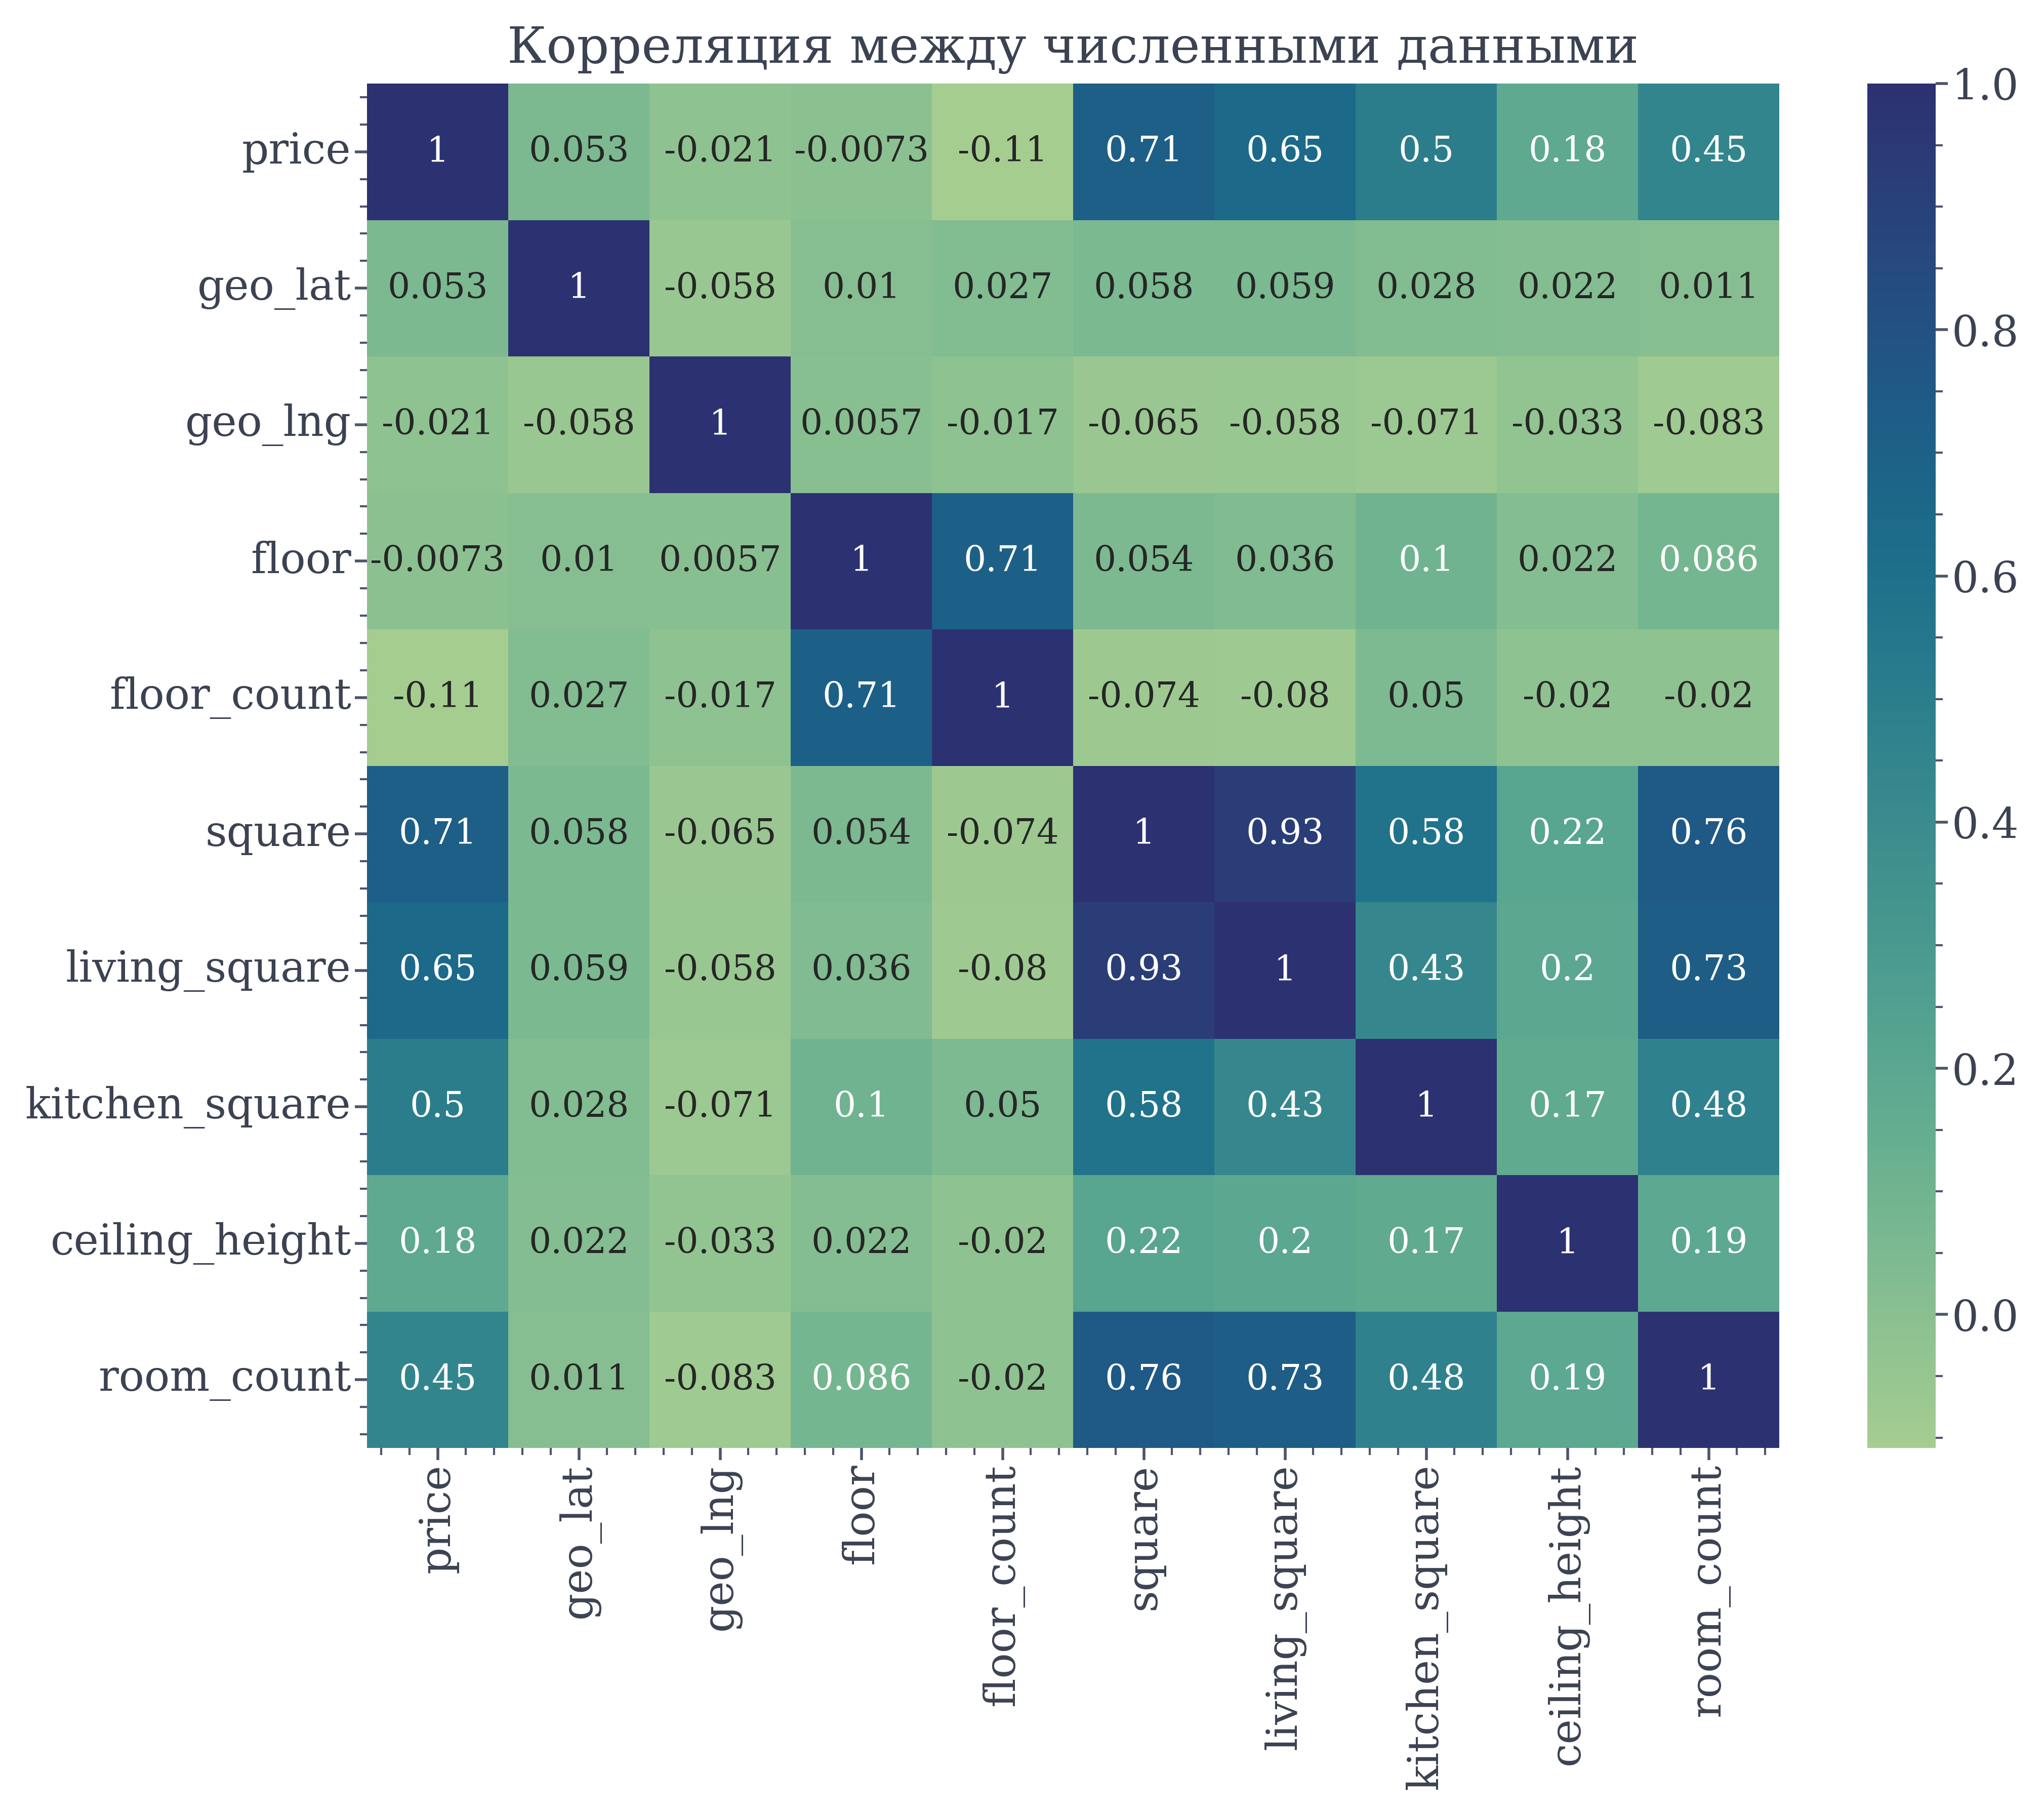

In [27]:
corr = tmp[numerical_features_tmp].corr()

plt.figure(figsize=(9, 7), dpi=500)

sns.heatmap(
    corr,
    cmap="crest",
    annot=True,
    annot_kws={
        "fontsize": 10,
    },
)

plt.title("Корреляция между численными данными")
plt.grid(False)
plt.xticks(rotation=90)

# pdf.savefig(bbox_inches = 'tight')
plt.show()

### Заполняя пропуски

In [28]:
df_cian["square"] = df_cian["square"].apply(float)

Логика заполнения: получить соотношение жилой площади к общей, опираясь на количество комнат в квартире

In [29]:
tmp = df_cian[df_cian["living_square"] != "unknown"][["square", "living_square", "room_count"]]
tmp["lsqr/sqr"] = tmp["living_square"].apply(float) / tmp["square"]
tmp = tmp.groupby(by="room_count", as_index=False).agg({"lsqr/sqr": "mean"})
tmp

room_count  lsqr/sqr
0           1  0.476982
1           2  0.549417
2           3  0.592057
3           4  0.589595
4           5  0.623578
5           6  0.645722

In [30]:
tmp = df_cian.merge(tmp, on="room_count")
tmp.loc[tmp["living_square"] == "unknown", "living_square"] = tmp["square"] * tmp["lsqr/sqr"]
tmp["living_square"] = tmp["living_square"].apply(lambda x: round(float(x), 2))
df_cian["living_square"] = tmp["living_square"]

Логика заполнения: получить соотношение площади кухни к общей, опираясь на количество комнат в квартире

In [31]:
tmp = df_cian[df_cian["kitchen_square"] != "unknown"][["square", "kitchen_square", "room_count"]]
tmp["ksqr/sqr"] = tmp["kitchen_square"].apply(float) / tmp["square"]
tmp = tmp.groupby(by="room_count", as_index=False).agg({"ksqr/sqr": "mean"})
tmp

room_count  ksqr/sqr
0           1  0.262817
1           2  0.211080
2           3  0.170644
3           4  0.160629
4           5  0.120957
5           6  0.095732

In [32]:
tmp = df_cian.merge(tmp, on="room_count")
tmp.loc[tmp["kitchen_square"] == "unknown", "kitchen_square"] = tmp["square"] * tmp["ksqr/sqr"]
tmp["kitchen_square"] = tmp["kitchen_square"].apply(lambda x: round(float(x), 2))
df_cian["kitchen_square"] = tmp["kitchen_square"]

Логика заполнения: средняя высота потолков по всем данным

In [33]:
df_cian.loc[df_cian["ceiling_height"] == "unknown", "ceiling_height"] = np.mean(
    df_cian[df_cian["ceiling_height"] != "unknown"]["ceiling_height"]
    .apply(lambda x: round(float(x), 2))
    .values
)
df_cian["ceiling_height"] = df_cian["ceiling_height"].apply(lambda x: round(float(x), 2))

In [34]:
df_cian.head()

price                                           location    geo_lat  \
0  18374400  Москва, СВАО, р-н Марьина роща, Тэйт жилой ком...  55.802530   
1  49954800  Москва, ЦАО, р-н Таганский, Славянская пл., 2/5с1  55.752541   
2   8170000  Москва, НАО (Новомосковский), Филимонковское п...  55.552637   
3  20206500  Москва, СВАО, р-н Останкинский, ул. Годовикова...  55.810466   
4  17119620  Москва, ЮАО, р-н Даниловский, Автозаводская ул...  55.706597   

     geo_lng             metro  floor  floor_count  square  living_square  \
0  37.620945      Марьина Роща     34           49   38.28          11.80   
1  37.635727       Китай-город      7            8   53.20          25.38   
2  37.337172  Аэропорт Внуково      2            5   31.00          14.79   
3  37.624247      Алексеевская     34           37   28.50          21.40   
4  37.632285          Тульская      6           20   38.82          10.60   

   kitchen_square  ... ceiling_height      view           house_type  \
0           10.06  ...           3.12   unknown  Монолитно-кирпичный   
1           24.10  ...           3.00   unknown  Монолитно-кирпичный   
2           10.00  ...           3.00   Во двор              unknown   
3            7.49  ...           3.01  На улицу  Монолитно-кирпичный   
4           18.60  ...           2.85   Во двор           Монолитный   

          heating breakdown  parking       accomodation_type   author  \
0         unknown   unknown  unknown             Новостройка  КОРТРОС   
1         unknown   unknown  unknown  Вторичка / Апартаменты  unknown   
2  Нет информации       Нет  unknown                Вторичка  unknown   
3         unknown   unknown  unknown             Новостройка  КОРТРОС   
4         unknown   unknown  unknown             Новостройка  unknown   

                                        url room_count  
0  https://www.cian.ru/sale/flat/302789697/          1  
1  https://www.cian.ru/sale/flat/301496936/          1  
2  https://www.cian.ru/sale/flat/303552909/          1  
3  https://www.cian.ru/sale/flat/306568424/          1  
4  https://www.cian.ru/sale/flat/305679800/          1  

[5 rows x 22 columns]

In [35]:
numerical_features = [f for f in df_cian.columns if df_cian.dtypes[f] != "object"]
categorical_features = [f for f in df_cian.columns if df_cian.dtypes[f] == "object"]
numerical_features

['price',
 'geo_lat',
 'geo_lng',
 'floor',
 'floor_count',
 'square',
 'living_square',
 'kitchen_square',
 'ceiling_height',
 'room_count']

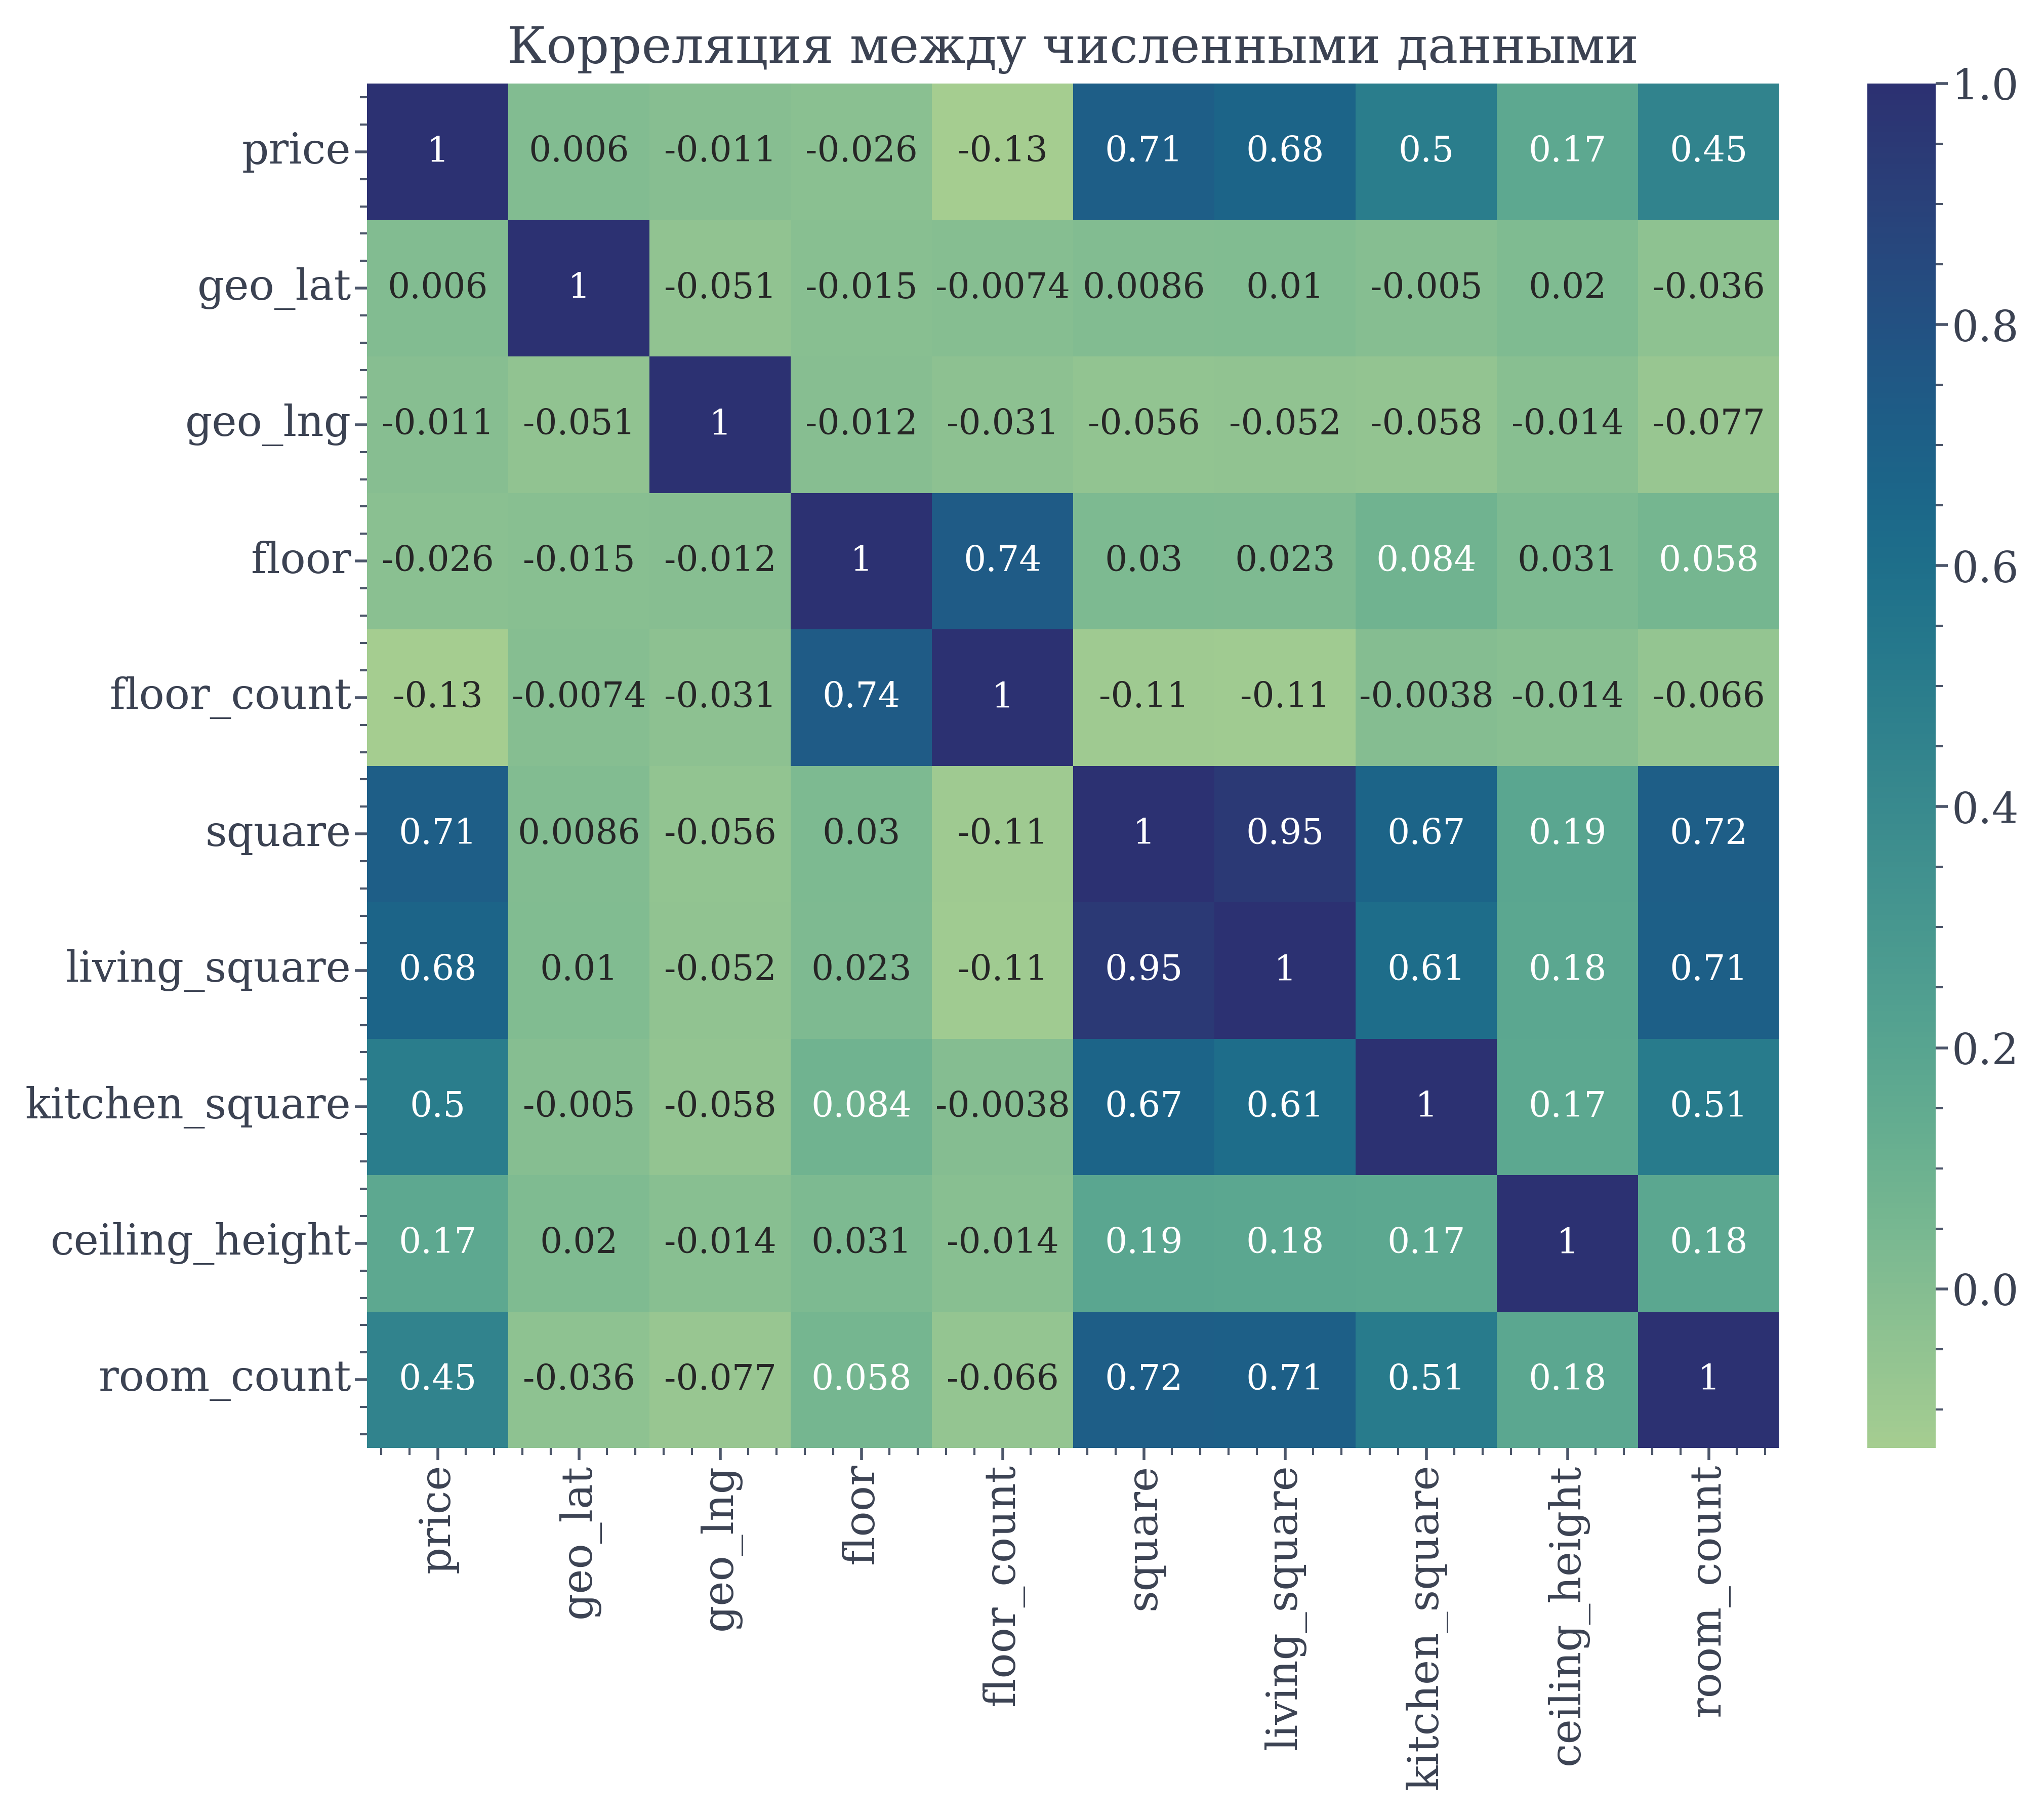

In [36]:
corr = df_cian[numerical_features].corr()

plt.figure(figsize=(9, 7), dpi=500)

sns.heatmap(
    corr,
    cmap="crest",
    annot=True,
    annot_kws={
        "fontsize": 10,
    },
)

plt.title("Корреляция между численными данными")
plt.grid(False)
plt.xticks(rotation=90)

# pdf.savefig(bbox_inches = 'tight')
plt.show()

Так же стоит заметить, что пока что координаты по-отдельности слабо влияют на ценобразование. Так как они редко где совпадают (нет обобщения). Стоит попробовать закодировать ближайшую станцию метро и посмотреть, как район вляет на цену (возможно значимо влияет на цену, что в принципе логично).

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
tmp = df_cian[["price", "metro"]]
display(tmp.head(3))
display(tmp.shape)

label_enc = LabelEncoder()

label_enc.fit(tmp["metro"].unique())
tmp["metro_encoded"] = label_enc.transform(tmp["metro"])
display(tmp.head(3))

price             metro
0  18374400      Марьина Роща
1  49954800       Китай-город
2   8170000  Аэропорт Внуково

(8053, 2)

price             metro  metro_encoded
0  18374400      Марьина Роща            131
1  49954800       Китай-город             83
2   8170000  Аэропорт Внуково             13

In [39]:
corr = tmp[["price", "metro_encoded"]].corr()

plt.figure(figsize=(9, 7), dpi=500)

sns.heatmap(
    corr,
    cmap="crest",
    annot=True,
    annot_kws={
        "fontsize": 10,
    },
)

plt.title("Корреляция между численными данными")
plt.grid(False)
plt.xticks(rotation=90)

# pdf.savefig(bbox_inches = 'tight')
plt.show()

Корреляция ниже 0.7, что указывает, что близость к станции метро не сильно влияет на цену.

> NOTE: стоит добавить данную фитчу при проектировании модели

## Feature engineering

### О чем блок 

В этом блоке попробуем придумать фитчи из уже имеющихся и посмотрим на их корреляцию

### 1

Отношение floor к floor_count

In [40]:
display(df_cian["floor"].describe())
display(df_cian["floor_count"].describe())


count    8053.000000
mean        9.733143
std         9.829480
min         1.000000
25%         3.000000
50%         6.000000
75%        13.000000
max        94.000000
Name: floor, dtype: float64

count    8053.000000
mean       17.797591
std        14.002919
min         1.000000
25%         8.000000
50%        14.000000
75%        22.000000
max        97.000000
Name: floor_count, dtype: float64

Этаж как минимум 1, следовательно, не возникнет проблем при делении

price  floor  floor_count     ratio
0  18374400     34           49  0.693878
1  49954800      7            8  0.875000
2   8170000      2            5  0.400000

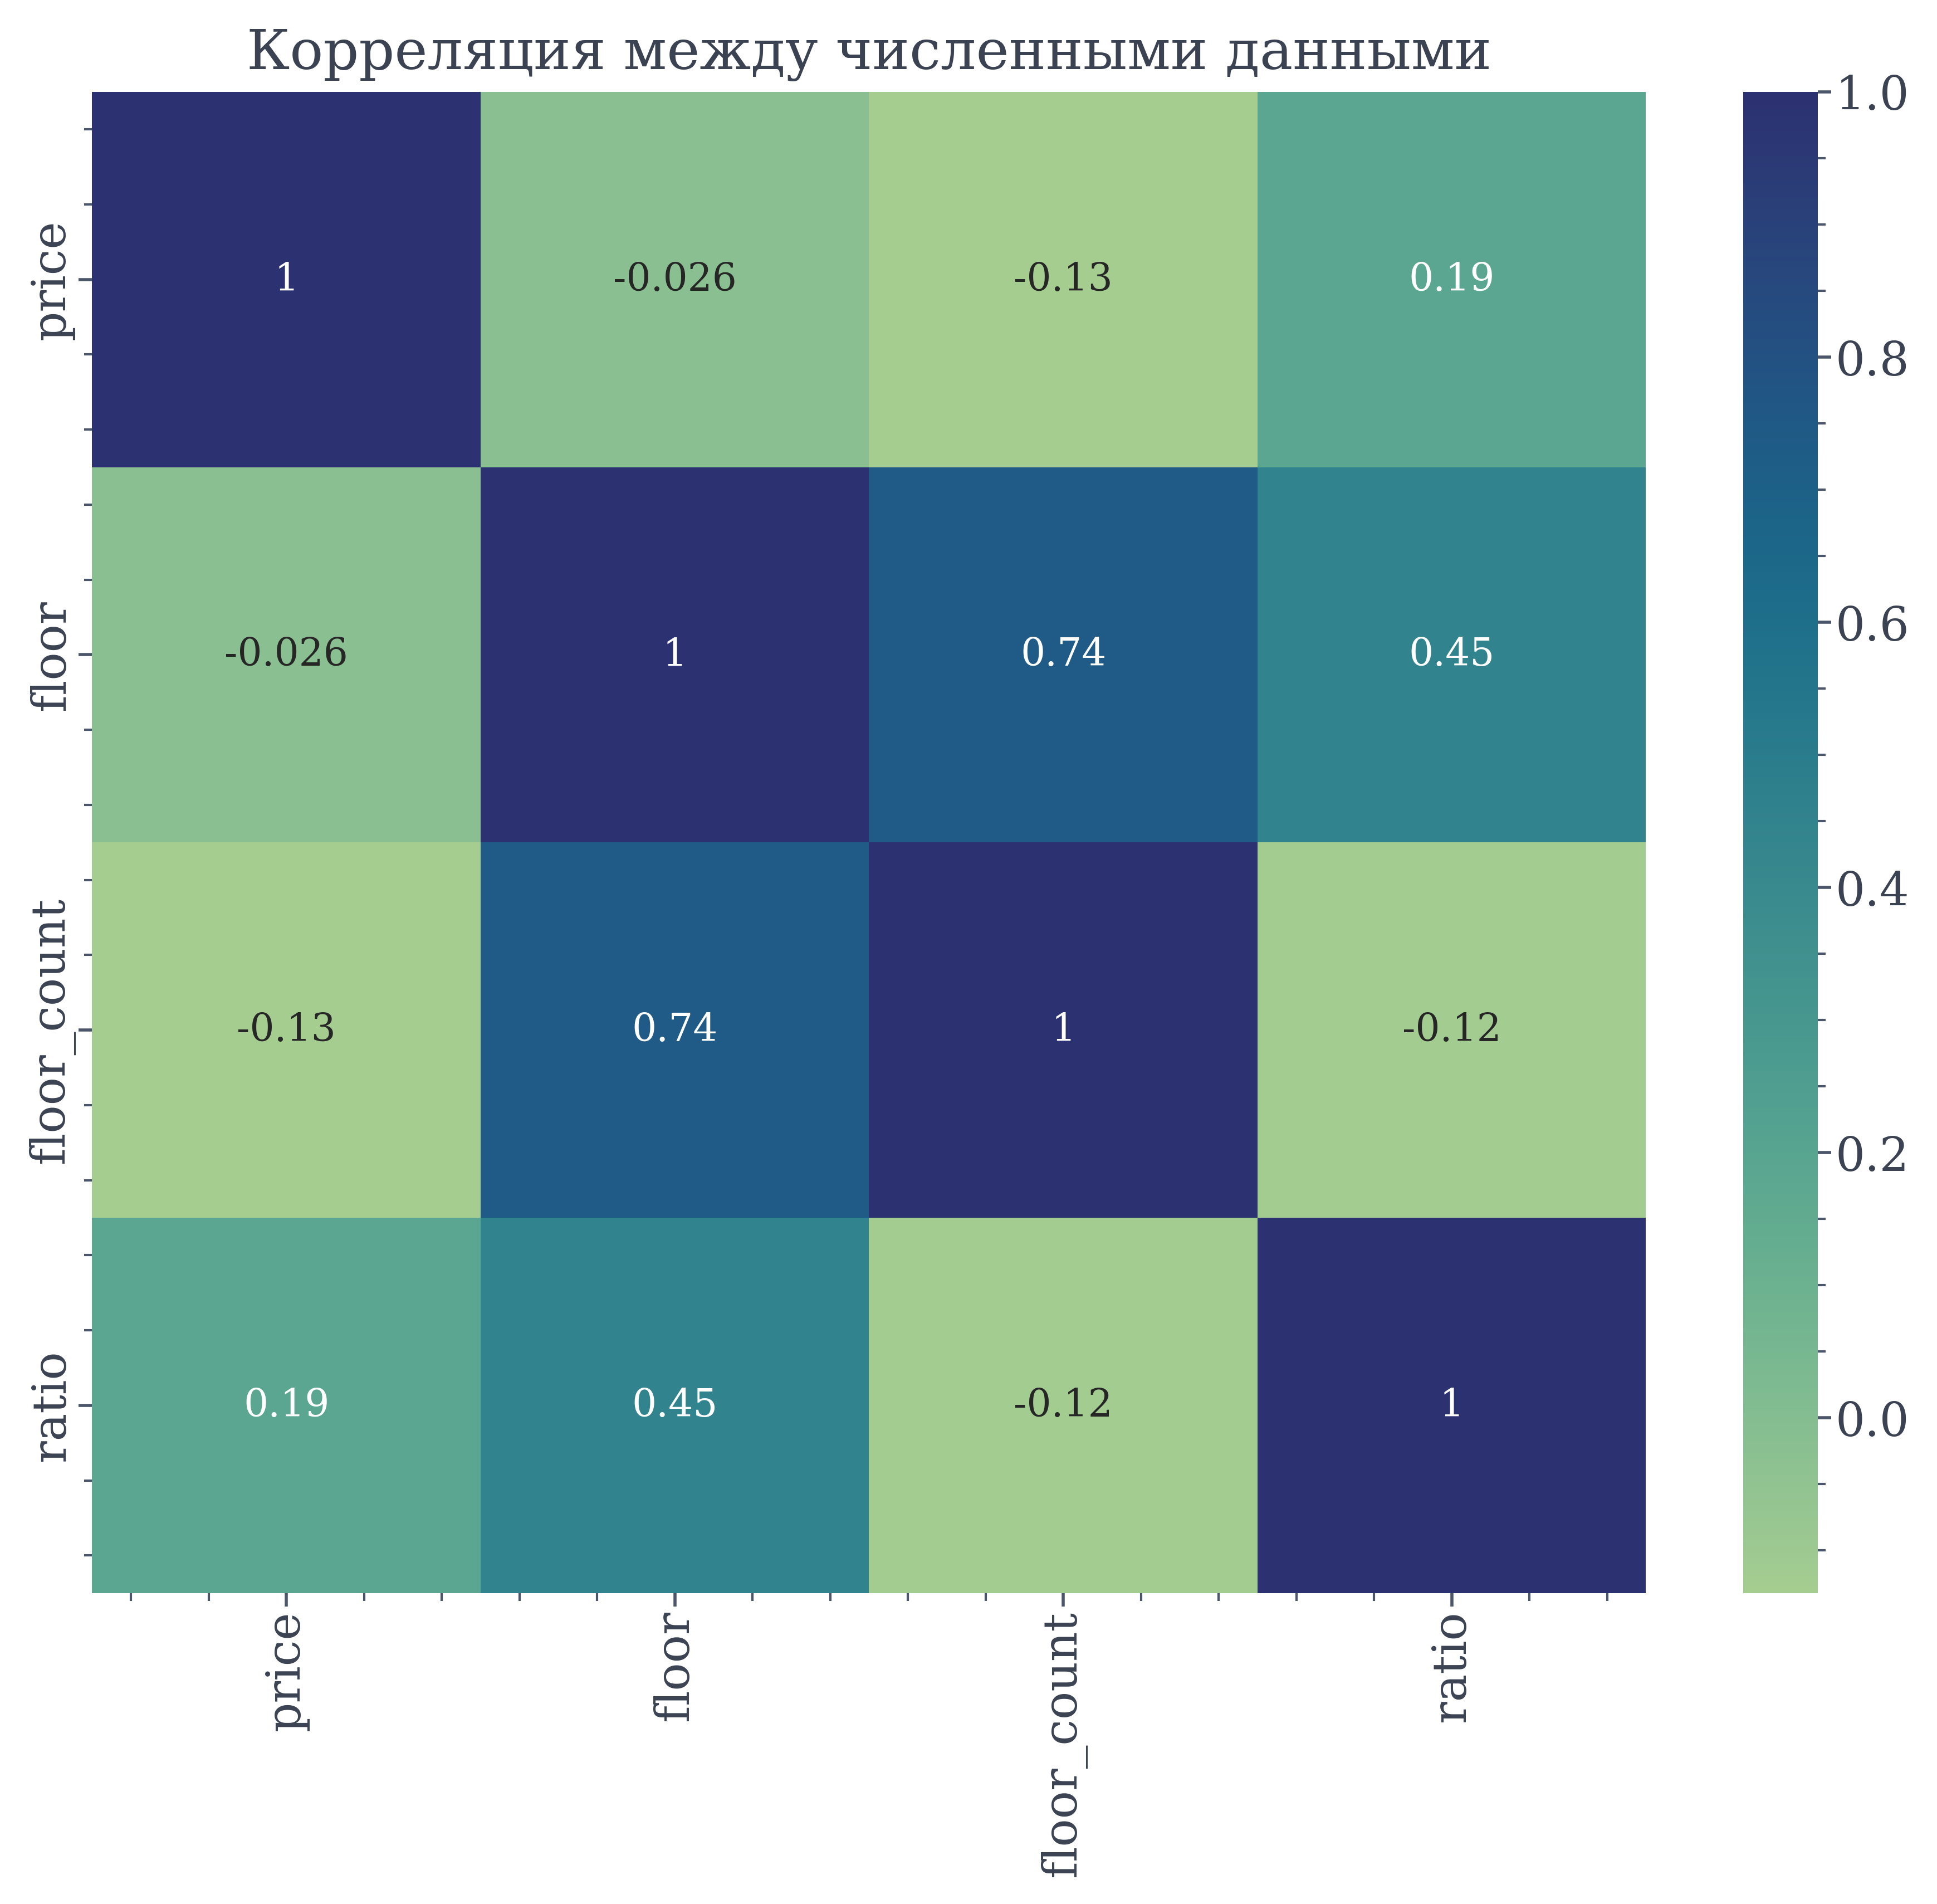

In [41]:
tmp = df_cian[["price", "floor", "floor_count"]]
tmp["ratio"] = df_cian["floor"] / df_cian["floor_count"]

display(tmp.head(3))

corr = tmp[["price", "floor", "floor_count", "ratio"]].corr()

plt.figure(figsize=(9, 7), dpi=500)

sns.heatmap(
    corr,
    cmap="crest",
    annot=True,
    annot_kws={
        "fontsize": 10,
    },
)

plt.title("Корреляция между численными данными")
plt.grid(False)
plt.xticks(rotation=90)

# pdf.savefig(bbox_inches = 'tight')
plt.show()

Данное отношение дает более сильную корреляцию, что является хорошим показателем

> NOTE: стоит добавить данную фитчу при проектировании модели

### 2

Так же будет неплохо знать отношение общей площади квартры к жилой площади и площади кухни.
> NOTE: если известна общая площадь, но неизвестны две другие, то они будут заполнятся по осредненным коэффициентам (как это было выше)

price  square  living_square  kitchen_square  living_ratio  \
0  18374400   38.28          11.80           10.06      0.308255   
1  49954800   53.20          25.38           24.10      0.477068   
2   8170000   31.00          14.79           10.00      0.477097   

   kitchen_ratio  
0       0.262800  
1       0.453008  
2       0.322581

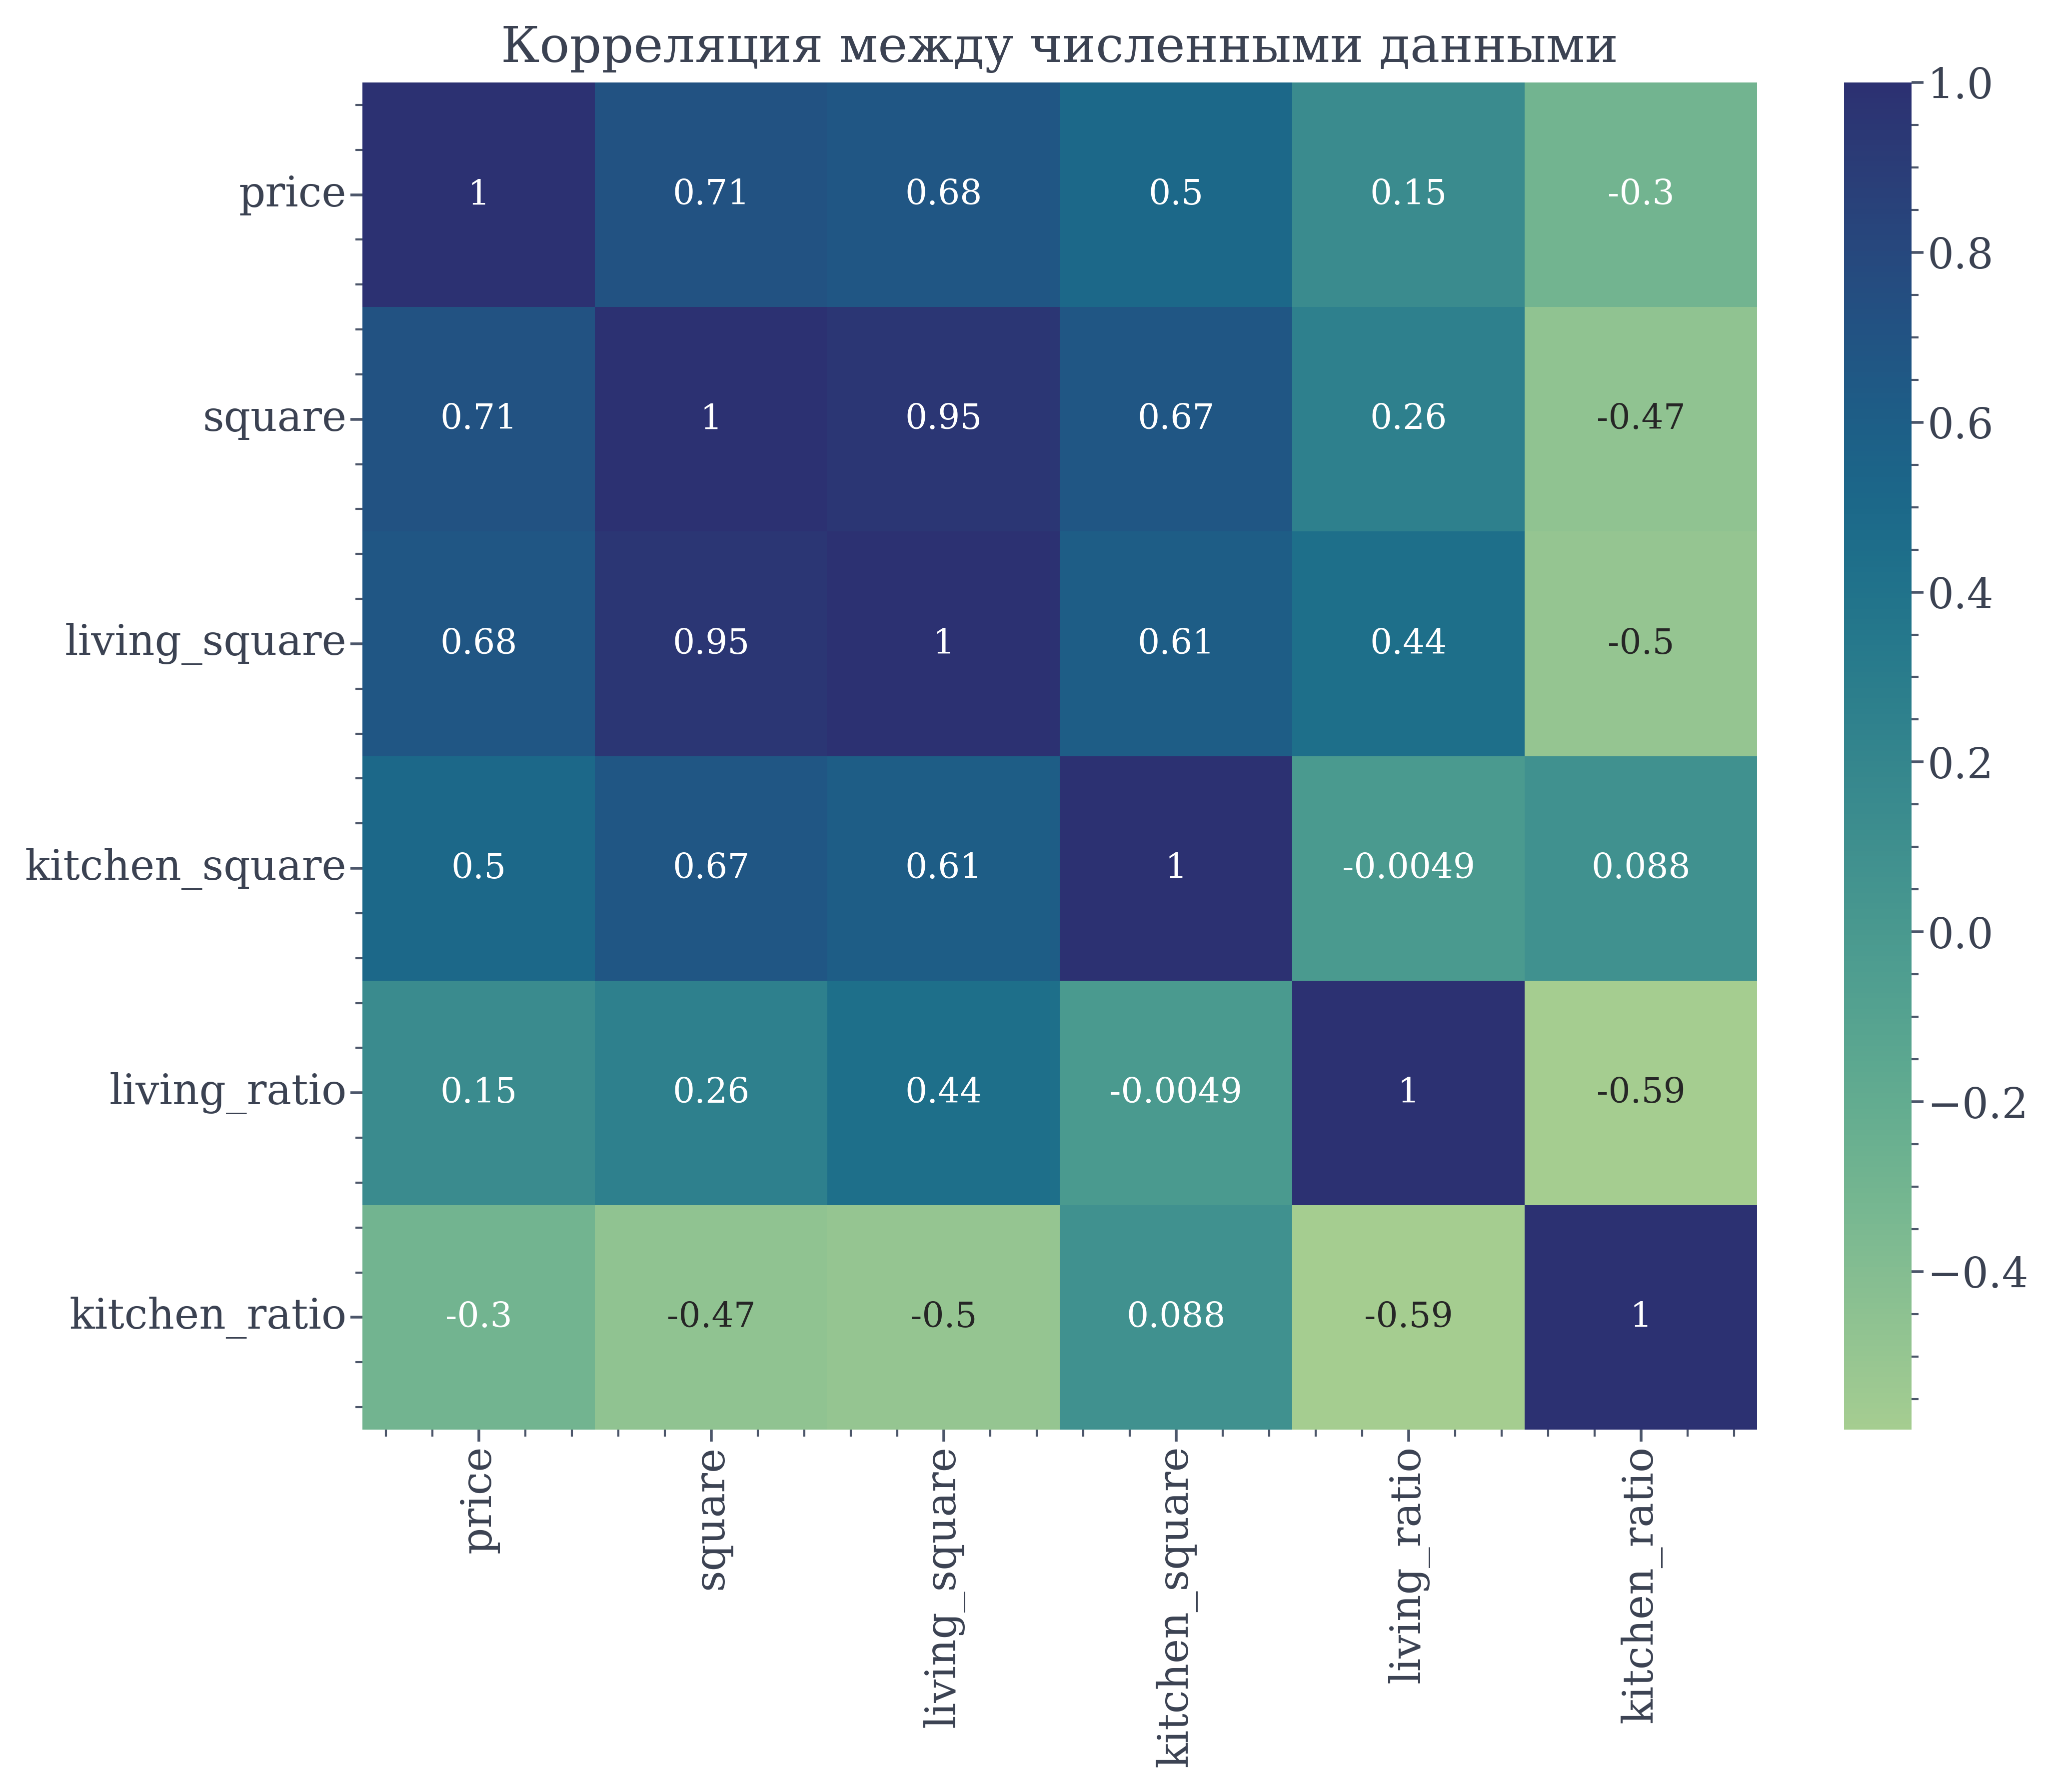

In [42]:
tmp = df_cian[["price", "square", "living_square", "kitchen_square"]]
tmp["living_ratio"] = df_cian["living_square"] / df_cian["square"]
tmp["kitchen_ratio"] = df_cian["kitchen_square"] / df_cian["square"]

display(tmp.head(3))

corr = tmp[
    [
        "price",
        "square",
        "living_square",
        "kitchen_square",
        "living_ratio",
        "kitchen_ratio",
    ]
].corr()

plt.figure(figsize=(9, 7), dpi=500)

sns.heatmap(
    corr,
    cmap="crest",
    annot=True,
    annot_kws={
        "fontsize": 10,
    },
)

plt.title("Корреляция между численными данными")
plt.grid(False)
plt.xticks(rotation=90)

# pdf.savefig(bbox_inches = 'tight')
plt.show()

Данные параметры так же относительно неплохо коррелируют с ценой.

## Посмотрим теперь на категориальные признаки

In [43]:
df_cian["finish_type"].value_counts()


finish_type
Дизайнерский                                     2071
Без ремонта                                      1503
Евроремонт                                       1047
Косметический                                     769
Без отделки                                       641
unknown                                           444
Без отделки, чистовая                             339
Без отделки, предчистовая, чистовая               227
Чистовая                                          224
Без отделки, предчистовая, черновая, чистовая     144
Без отделки, предчистовая                         127
Предчистовая                                      116
Предчистовая, чистовая                            107
Неизвестно                                         57
Без отделки, черновая, чистовая                    38
Черновая                                           35
Без отделки, чистовая с мебелью                    33
Без отделки, черновая                              32
Без отделки, пре

Данных достаточно по каждому сегменту. Считаю, что стоит объединить некоторые блоки.

- Все, что содержит "Без отделки" -> Без отделки
- "-" -> unknown
- Предчистовая, черновая, чистовая -> Черновая
- Черновая, чистовая -> Черновая
- Чистовая с мебелью  -> Чистовая
- С отделкой -> Без ремонта
- Неизвестно -> unknown
- Предчистовая, чистовая -> Предчистовая

In [44]:
df_cian["house_type"].value_counts()


house_type
Монолитный                                    3115
Кирпичный                                     1298
unknown                                       1259
Монолитно-кирпичный                           1204
Панельный                                      607
Монолитно-кирпичный, монолитный                287
Блочный                                        197
Панельный, монолитный                           67
Монолитно-кирпичный, монолитный, кирпичный      11
Сталинский                                       4
Монолитный, кирпичный                            2
Газобетонный блок                                1
Деревянный                                       1
Name: count, dtype: int64

Данных достаточно по каждому сегменту. Считаю, что стоит объединить некоторые блоки.

- Газобетон -> Блочный
- Монолитно-кирпичный, кирпичный  -> Монолитно-кирпичный
- Монолитно-кирпичный, монолитный  -> Монолитно-кирпичный
- Монолитно-кирпичный, монолитный, кирпичный -> Монолитно-кирпичный
- Панельный, монолитный -> Панельный
- Газобетонный блок -> Блочный
- Деревянный -> unknown (почти как выброс)


In [45]:
df_cian["author"].value_counts().to_frame().to_dict()

{'count': {'unknown': 6198,
  'Группа Самолет': 231,
  'А101': 189,
  'MR Group': 89,
  'Класс': 81,
  'КОРТРОС': 76,
  'ГК ФСК': 69,
  'Level Group': 59,
  'Sminex': 57,
  'ГК Инград': 56,
  'TEKTA GROUP': 53,
  '1-й ДСК': 53,
  'ДОНСТРОЙ': 48,
  'ГК Основа': 41,
  'Optima Development': 30,
  'Capital Group': 28,
  'Центр-Инвест': 26,
  'ГК ТехноСтройОлимп': 25,
  'Главстрой': 22,
  'Рублево-Архангельское': 21,
  'Абсолют Недвижимость': 18,
  'Компания PIONEER': 17,
  'Концерн КРОСТ': 17,
  'FORMA': 17,
  'Группа Эталон': 16,
  'VESPER': 15,
  'ANT Development': 15,
  'Группа Родина': 15,
  'СЗ Риверхаус': 15,
  'СЗ Киноцентр': 14,
  'РГ-Девелопмент': 14,
  'AUTHOR DEVELOPMENT': 13,
  'STONE': 12,
  'ГК Сумма Элементов': 12,
  'Ташир': 12,
  'Regions Development': 12,
  'AFI Development': 12,
  'ПИК': 12,
  'Галс-Девелопмент': 12,
  'СЗ Минские холмы': 11,
  'Hutton Development': 11,
  'IKON Development': 11,
  'DOGMA': 10,
  'St Michael': 10,
  'ГК Страна Девелопмент': 9,
  'Брусника

При построении модели стоит проверить как влияет данный столбец, так как, возможно либо стоит оставить первых 40 застройщиков, остальное слить в  unknown

In [46]:
df_cian["parking"].value_counts()


parking
unknown    8053
Name: count, dtype: int64

Данную строку стоит исключить, т.к. ни на что не повлияет

In [47]:
df_cian["breakdown"].value_counts()


breakdown
Нет        4786
unknown    3262
Да            5
Name: count, dtype: int64

Слишком мало зданий с аварийностью, что логично, т.к. смысла покупать квартиру в таком здании почти что нет.

price breakdown
0  18374400   unknown
1  49954800   unknown
2   8170000       Нет

(8053, 2)

price breakdown  breakdown_encoded
0  18374400   unknown                  0
1  49954800   unknown                  0
2   8170000       Нет                  2

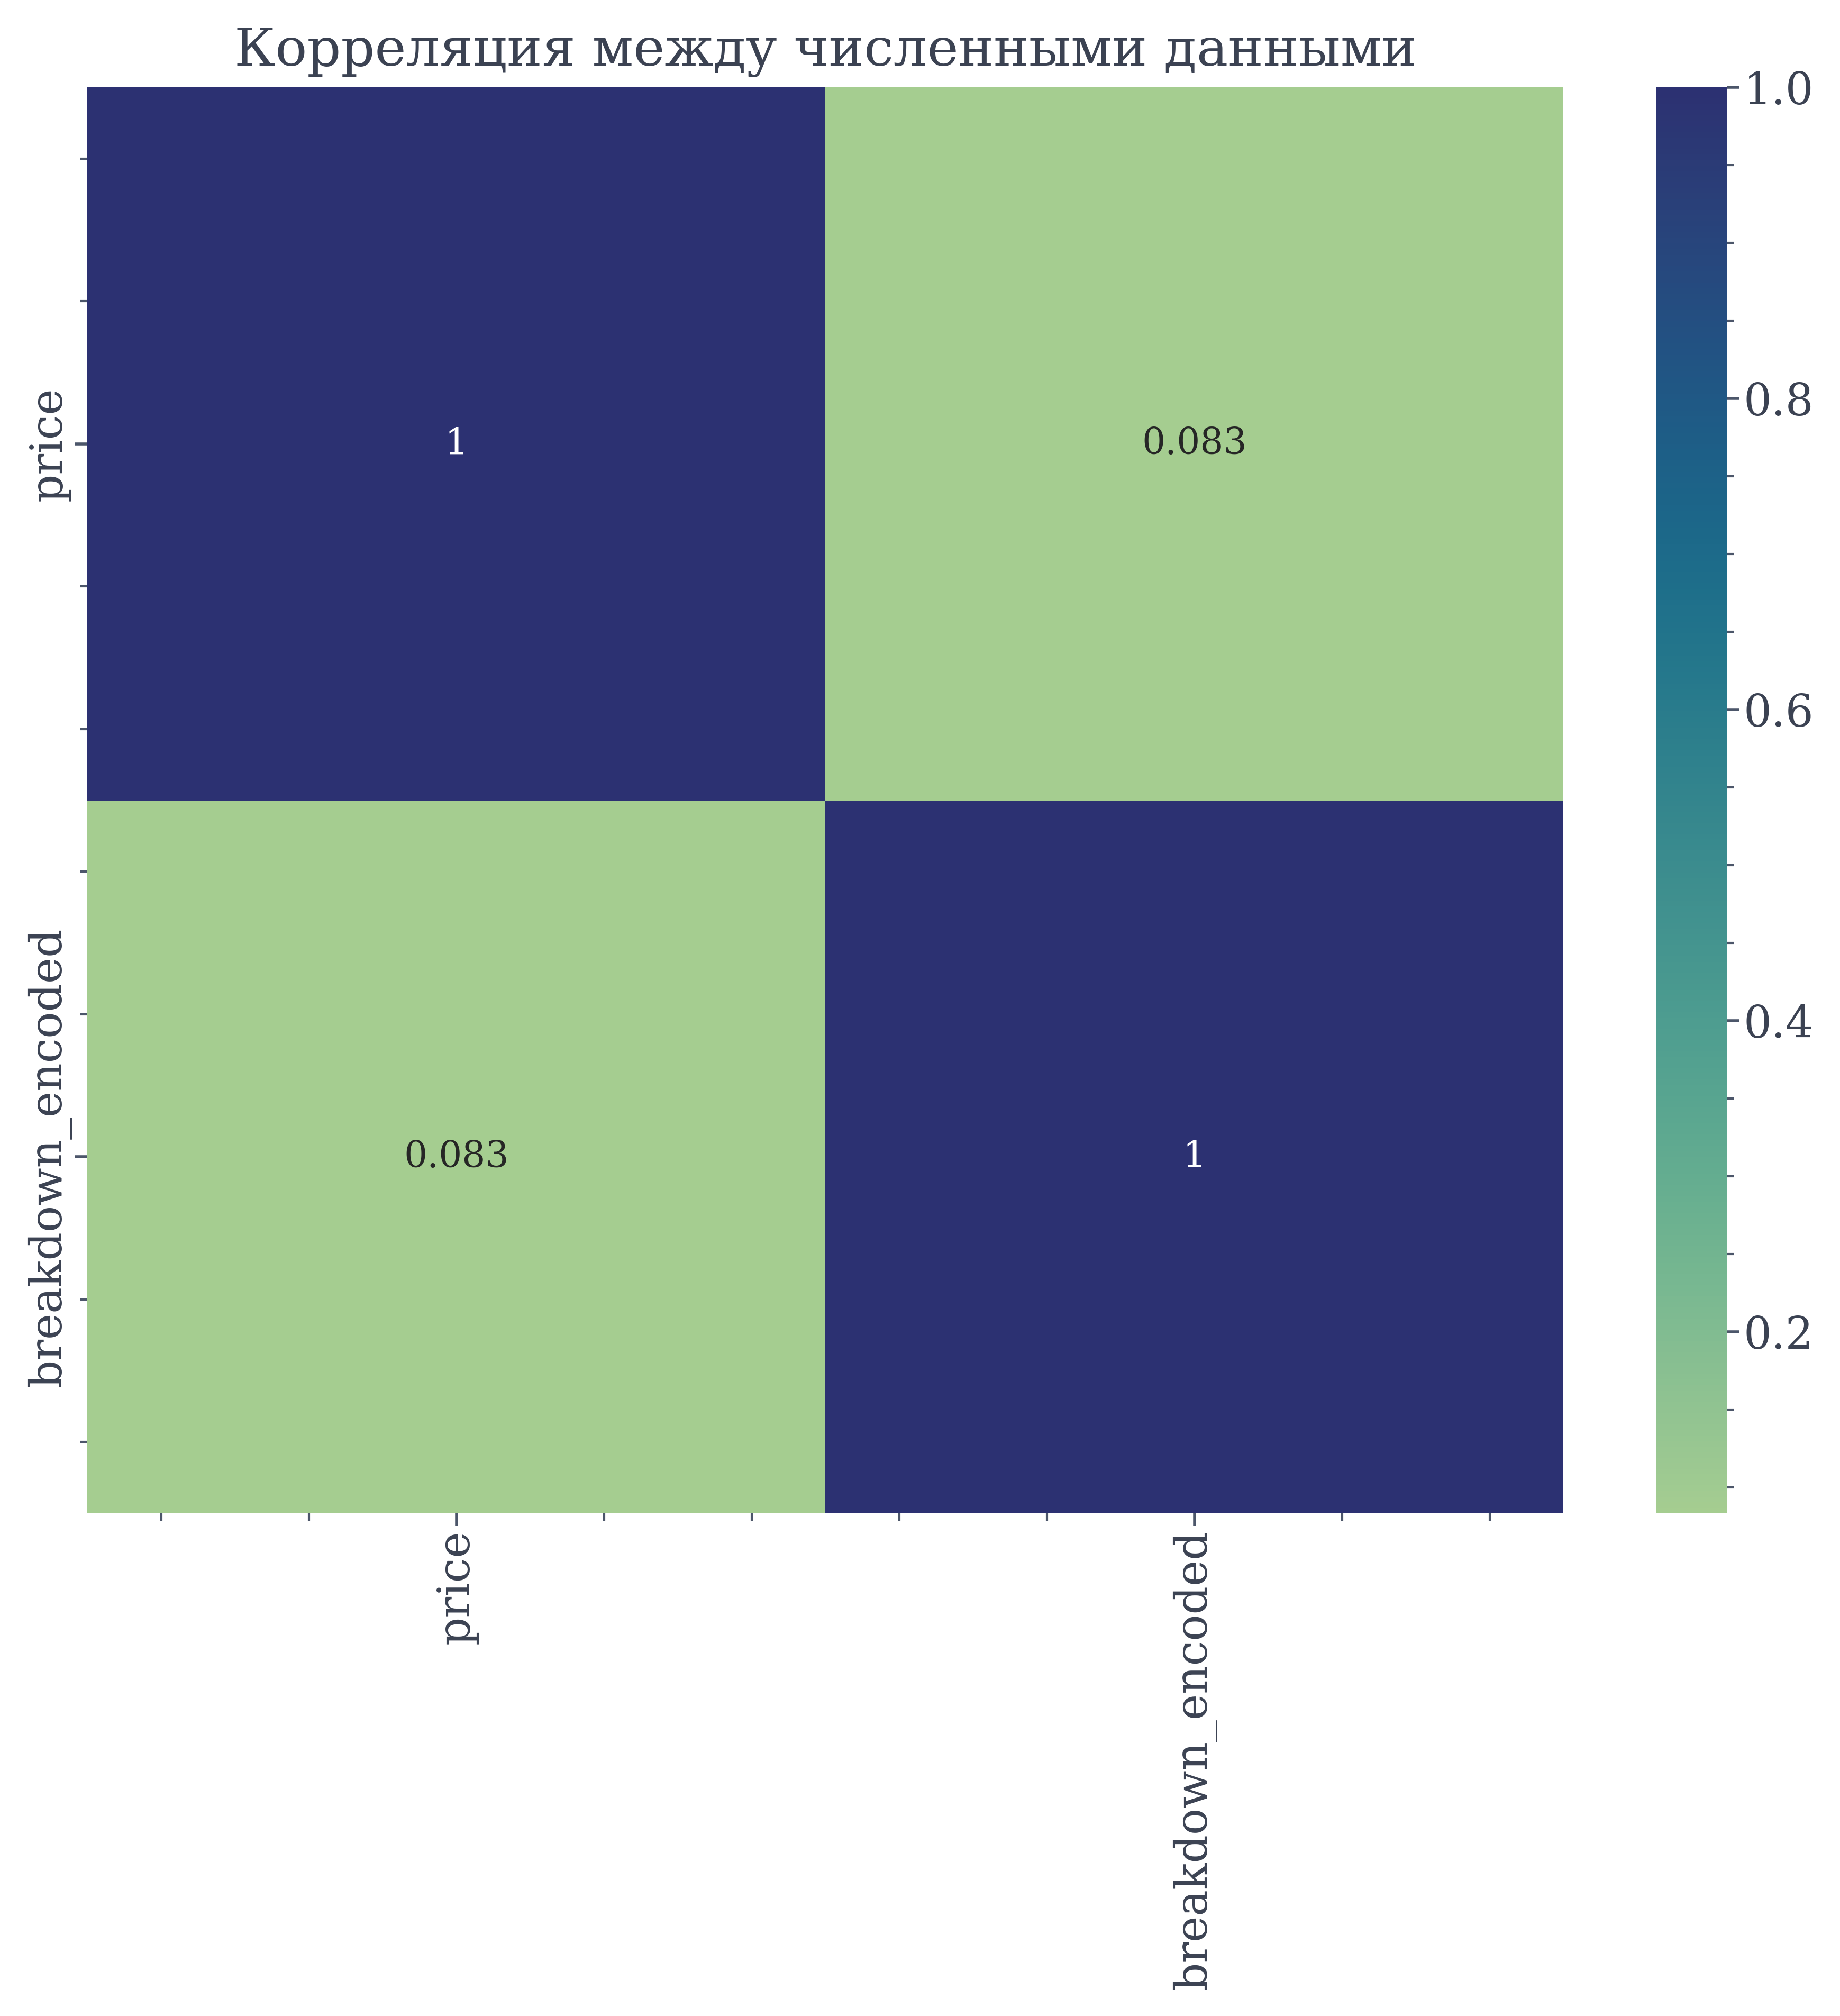

In [48]:
tmp = df_cian[["price", "breakdown"]]
display(tmp.head(3))
display(tmp.shape)

label_enc = LabelEncoder()

label_enc.fit(tmp["breakdown"].unique())
tmp["breakdown_encoded"] = label_enc.transform(tmp["breakdown"])
display(tmp.head(3))

corr = tmp[["price", "breakdown_encoded"]].corr()

plt.figure(figsize=(9, 7), dpi=500)

sns.heatmap(
    corr,
    cmap="crest",
    annot=True,
    annot_kws={
        "fontsize": 10,
    },
)

plt.title("Корреляция между численными данными")
plt.grid(False)
plt.xticks(rotation=90)

# pdf.savefig(bbox_inches = 'tight')
plt.show()

От столбца с аварийностью возможно стоит отказаться

In [49]:
df_cian["heating"].value_counts()

heating
unknown                          3262
Центральное                      3161
Нет информации                    761
Индивидуальный тепловой пункт     675
Автономная котельная              143
Котел/Квартирное отопление         42
Электрическое                       7
Нет                                 2
Name: count, dtype: int64

Считаю, что стоит объединить некоторые блоки.

- Нет информации -> unknown
- Котел/Квартирное отопление -> Индивидуальный тепловой пункт


In [50]:
df_cian["view"].value_counts()

view
unknown            2788
На улицу и двор    2211
Во двор            1937
На улицу           1117
Name: count, dtype: int64

Здесь все хорошо

In [51]:
df_cian["accomodation_type"].value_counts()

accomodation_type
Вторичка                     4796
Новостройка                  2212
Вторичка / Апартаменты        586
Вторичка / Пентхаус           215
Новостройка / Апартаменты     195
Новостройка / Пентхаус         49
Name: count, dtype: int64

Здесь тоже хорошо: по каждому пункту данных достаточно